In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Import Library

In [ ]:
!pip install split-folders
!pip install tensorflow
!pip install keras_tuner
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.34.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.multioutput import MultiOutputClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

import pickle
import tensorflowjs as tfjs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hldfiadn","key":"5e292f8648fa04f386ce49b697f4e3d6"}'}

# Setup Folder dan Split Dataset Manual

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Jun 11 02:55 kaggle.json


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 1.01GB/s]
Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 210MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset
!unzip heart-disease-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/2.66M [00:00<?, ?B/s]
100% 2.66M/2.66M [00:00<00:00, 819MB/s]
Archive:  heart-disease-health-indicators-dataset.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset
!unzip diabetes-health-indicators-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 293MB/s]
Archive:  diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
# Muat setiap dataset
df_heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
# df_lung_cancer = pd.read_csv('lung_cancer_prediction_dataset.csv') # Opsional, jika ingin menambahkan kanker paru

print("Dataset berhasil dimuat.")
print(f"Shape Heart Disease: {df_heart.shape}")
print(f"Shape Stroke: {df_stroke.shape}")
print(f"Shape Diabetes: {df_diabetes.shape}")
# print(f"Shape Lung Cancer: {df_lung_cancer.shape}")

Dataset berhasil dimuat.
Shape Heart Disease: (253680, 22)
Shape Stroke: (5110, 12)
Shape Diabetes: (100000, 9)


In [ ]:
df1 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
df_heart1 = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df_heart1.describe(include = 'all')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df1.describe(include = 'all')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df_heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Eksplorasi Data Awal (EDA) dan Pembersihan

## EDA untuk Heart Disease Dataset

In [ ]:
print("\n--- EDA untuk Heart Disease Dataset ---")
print(df_heart.head())
print(df_heart.info())
print("\nMissing Value:\n", df_heart.isnull().sum())
print("\n", df_heart['HeartDiseaseorAttack'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Heart Disease Dataset ---
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  Ph

In [ ]:
'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk'

('PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk')

In [ ]:
kolom_kategorik1 = ['Sex', 'Education', 'Smoker', 'Diabetes', 'Income', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
for kolom in kolom_kategorik1:
    print(f"Unique values di kolom '{kolom}':")
    print(df_heart[kolom].unique())
    print('-' * 40)

Unique values di kolom 'Sex':
[0. 1.]
----------------------------------------
Unique values di kolom 'Education':
[4. 6. 3. 5. 2. 1.]
----------------------------------------
Unique values di kolom 'Smoker':
[1. 0.]
----------------------------------------
Unique values di kolom 'Diabetes':
[0. 2. 1.]
----------------------------------------
Unique values di kolom 'Income':
[3. 1. 8. 6. 4. 7. 2. 5.]
----------------------------------------
Unique values di kolom 'PhysActivity':
[0. 1.]
----------------------------------------
Unique values di kolom 'Fruits':
[0. 1.]
----------------------------------------
Unique values di kolom 'Veggies':
[1. 0.]
----------------------------------------
Unique values di kolom 'HvyAlcoholConsump':
[0. 1.]
----------------------------------------
Unique values di kolom 'AnyHealthcare':
[1. 0.]
----------------------------------------
Unique values di kolom 'NoDocbcCost':
[0. 1.]
----------------------------------------
Unique values di kolom 'GenHlth':

In [ ]:
df_heart = df_heart[df_heart['Diabetes'] != 1]

In [ ]:
print("\nBanyaknya Data perstatus Stroke ", df_heart['Stroke'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data perstatus Diabetes ", df_heart['Diabetes'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data perstatus Penyakit Jantung ", df_heart['HeartDiseaseorAttack'].value_counts(normalize=False)) # Distribusi target


Banyaknya Data perstatus Stroke  Stroke
0.0    239022
1.0     10027
Name: count, dtype: int64

Banyaknya Data perstatus Diabetes  Diabetes
0.0    213703
2.0     35346
Name: count, dtype: int64

Banyaknya Data perstatus Penyakit Jantung  HeartDiseaseorAttack
0.0    225820
1.0     23229
Name: count, dtype: int64


## EDA untuk Stroke Dataset

In [ ]:
print("\n--- EDA untuk Stroke Dataset ---")
print(df_stroke.head())
print("\n", df_stroke.info())
print("\nMissing Value:\n", df_stroke.isnull().sum())
print("\nBanyaknya Data per-Target ", df_stroke['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_stroke['stroke'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Stroke Dataset ---
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.fr

In [ ]:
print("\nBanyaknya Data MV per-ever_married ", df_stroke['ever_married'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data MV per-work_type ", df_stroke['work_type'].value_counts(normalize=False)) # Distribusi target
print("\nBanyaknya Data MV per-Residence_type ", df_stroke['Residence_type'].value_counts(normalize=False)) # Distribusi target


Banyaknya Data MV per-ever_married  ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Banyaknya Data MV per-work_type  work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Banyaknya Data MV per-Residence_type  Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [ ]:
df_stroke_mv = df_stroke[df_stroke['bmi'].isnull()]
print("\nBanyaknya Data MV per-Target ", df_stroke_mv['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Data MV Target ", df_stroke_mv['stroke'].value_counts(normalize=True)) # Distribusi target
df_stroke_mv


Banyaknya Data MV per-Target  stroke
0    161
1     40
Name: count, dtype: int64

Distribusi Data MV Target  stroke
0    0.800995
1    0.199005
Name: proportion, dtype: float64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
df_stroke['bmi'] = df_stroke.groupby(['stroke','gender', 'hypertension', 'heart_disease', 'smoking_status'])['bmi'].transform(
    lambda x: x.fillna(x.median()))

print(df_stroke.head())
print("\nMissing Value:\n", df_stroke.isnull().sum())
print("\nBanyaknya Data per-Target ", df_stroke['stroke'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_stroke['stroke'].value_counts(normalize=True)) # Distribusi target

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  29.9     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing Value:
 id                   0
gender          

In [ ]:
kolom_kategorik2 = df_stroke.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik2:
    print(f"Unique values di kolom '{kolom}':")
    print(df_stroke[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Male' 'Female' 'Other']
----------------------------------------
Unique values di kolom 'ever_married':
['Yes' 'No']
----------------------------------------
Unique values di kolom 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------
Unique values di kolom 'Residence_type':
['Urban' 'Rural']
----------------------------------------
Unique values di kolom 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------


In [ ]:
df_stroke_go = df_stroke[df_stroke['gender'] == 'Other']
print("\nBanyaknya Data gender = other per-Target ", df_stroke_go['stroke'].value_counts(normalize=False)) # Distribusi target
df_stroke_go


Banyaknya Data gender = other per-Target  stroke
0    1
Name: count, dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
df_stroke = df_stroke[df_stroke['gender'] != 'Other']
kolom_kategorik2 = df_stroke.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik2:
    print(f"Unique values di kolom '{kolom}':")
    print(df_stroke[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Male' 'Female']
----------------------------------------
Unique values di kolom 'ever_married':
['Yes' 'No']
----------------------------------------
Unique values di kolom 'work_type':
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------
Unique values di kolom 'Residence_type':
['Urban' 'Rural']
----------------------------------------
Unique values di kolom 'smoking_status':
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------


## EDA untuk Diabetes Dataset

In [ ]:
print("\n--- EDA untuk Diabetes Dataset ---")
print(df_diabetes.head())
print(df_diabetes.info())
print("\nMissing Value:\n", df_diabetes.isnull().sum())
print("\nBanyaknya Data MV per-Target ", df_diabetes['diabetes'].value_counts(normalize=False)) # Distribusi target
print("\nDistribusi Target ", df_diabetes['diabetes'].value_counts(normalize=True)) # Distribusi target


--- EDA untuk Diabetes Dataset ---
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-n

In [ ]:
kolom_kategorik3 = df_diabetes.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik3:
    print(f"Unique values di kolom '{kolom}':")
    print(df_diabetes[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Female' 'Male' 'Other']
----------------------------------------
Unique values di kolom 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
----------------------------------------


In [ ]:
df_diabetes_go = df_diabetes[df_diabetes['gender'] == 'Other']
print("\nBanyaknya Data gender = other per-Target ", df_diabetes_go['diabetes'].value_counts(normalize=False)) # Distribusi target
df_diabetes_go


Banyaknya Data gender = other per-Target  diabetes
0    18
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [ ]:
df_diabetes = df_diabetes[df_diabetes['gender'] != 'Other']
kolom_kategorik3 = df_diabetes.select_dtypes(include=['object', 'category']).columns
for kolom in kolom_kategorik3:
    print(f"Unique values di kolom '{kolom}':")
    print(df_diabetes[kolom].unique())
    print('-' * 40)

Unique values di kolom 'gender':
['Female' 'Male']
----------------------------------------
Unique values di kolom 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
----------------------------------------


## Visualisasi Data

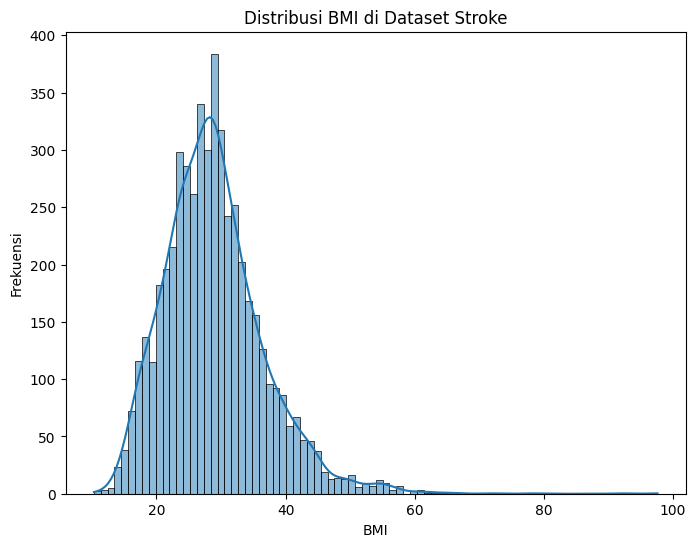

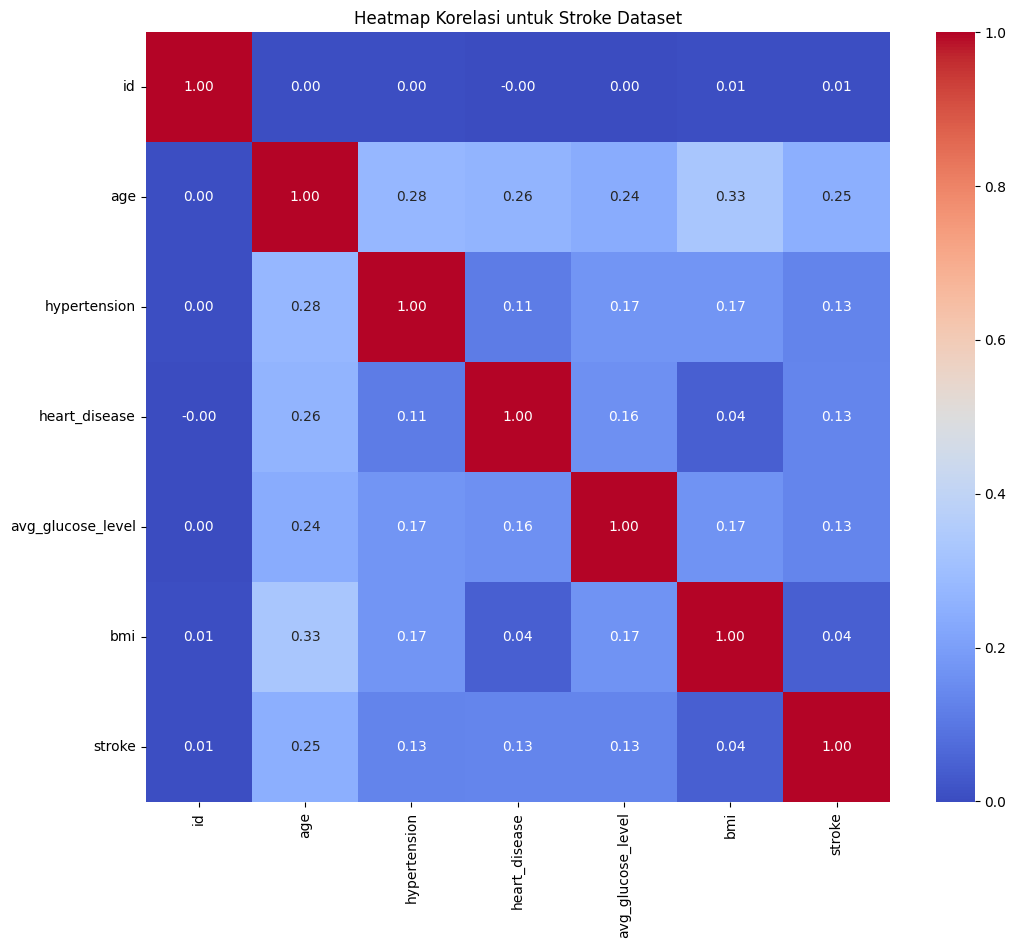

In [ ]:
# Contoh visualisasi distribusi IMT dari dataset stroke
plt.figure(figsize=(8, 6))
sns.histplot(df_stroke['bmi'].dropna(), kde=True)
plt.title('Distribusi BMI di Dataset Stroke')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_stroke.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Stroke Dataset')
plt.show()

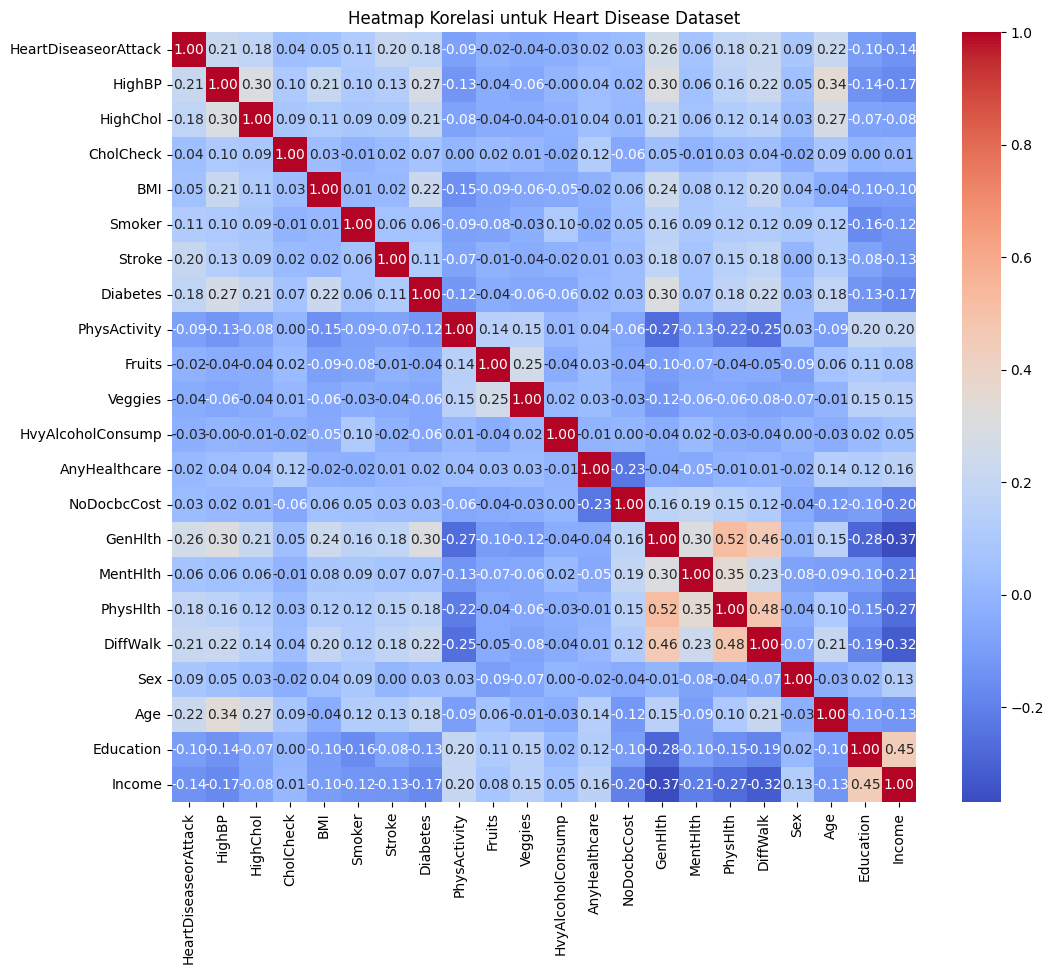

In [ ]:
# Visualisasi korelasi di dataset jantung
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Heart Disease Dataset')
plt.show()

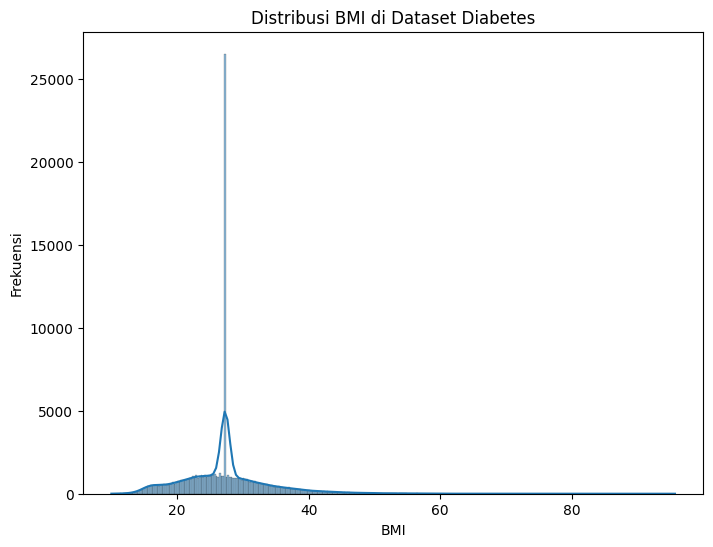

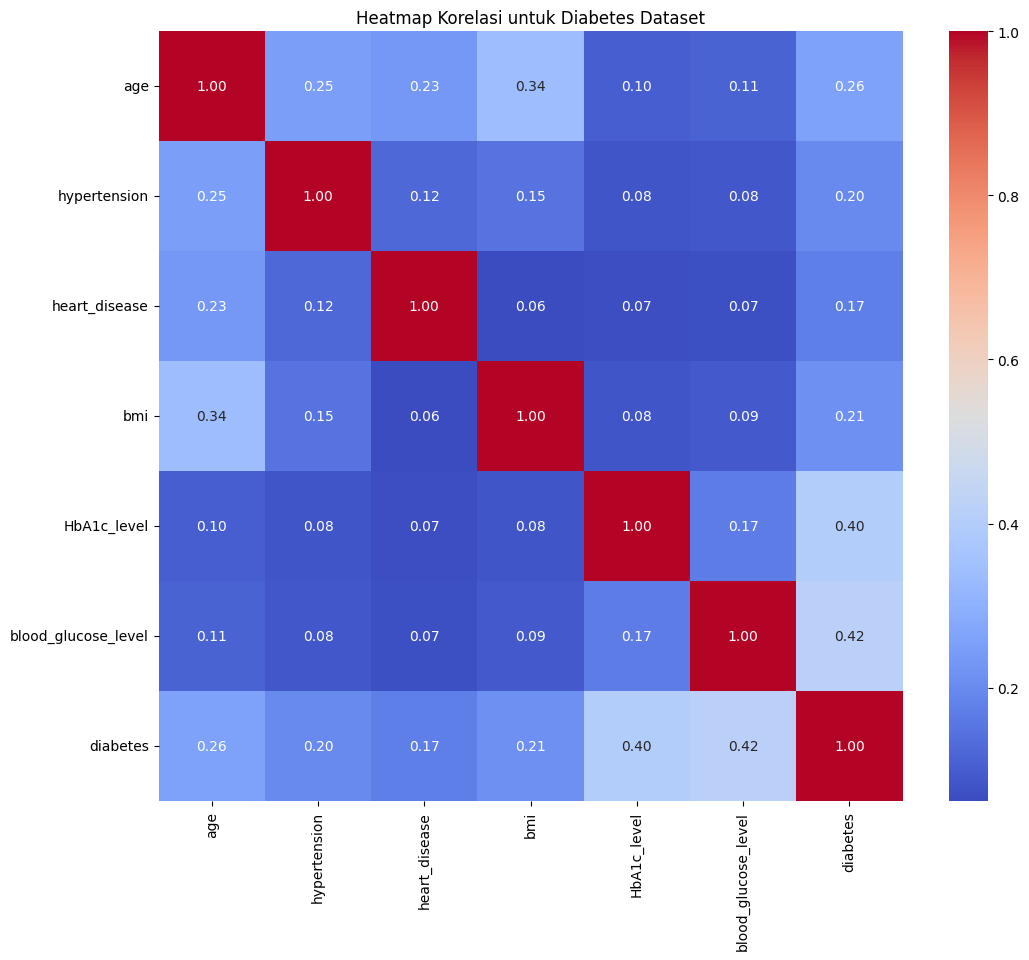

In [ ]:
# Contoh visualisasi distribusi IMT dari dataset dabetes
plt.figure(figsize=(8, 6))
sns.histplot(df_diabetes['bmi'].dropna(), kde=True)
plt.title('Distribusi BMI di Dataset Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df_diabetes.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi untuk Diabetes Dataset')
plt.show()

# Harmonisasi dan Penggabungan Dataset

In [ ]:
# Rename kolom target untuk kejelasan dan konsistensi
df_heart = df_heart.rename(columns={'HeartDiseaseorAttack': 'HeartDisease'})
df_stroke = df_stroke.rename(columns={'stroke': 'Stroke'})
df_diabetes = df_diabetes.rename(columns={'diabetes': 'Diabetes'})

In [ ]:
# Pilih fitur umum yang akan digunakan dan harmonisasikan nama kolom
# Ini adalah contoh, Anda mungkin perlu menyesuaikannya berdasarkan EDA Anda
common_features = [
    'Age', 'Sex', 'BMI', 'SmokingStatus', 'Hypertension', 'HeartDisease',
    'Glucose'
] # Ini harus diverifikasi lagi dengan kolom asli dari setiap dataset!

# Perbaiki nama kolom yang berbeda antar dataset (contoh)
df_heart = df_heart.rename(columns={
    'Age': 'Age', 'Sex': 'Gender', 'BMI': 'BMI', 'Smoker': 'SmokingStatus',
    'HighBP': 'Hypertension'
})
df_stroke = df_stroke.rename(columns={
    'gender': 'Gender', 'age': 'Age', 'avg_glucose_level': 'Glucose',
    'bmi': 'BMI', 'hypertension': 'Hypertension', 'heart_disease': 'HeartDisease',
    'smoking_status': 'SmokingStatus'
})
df_diabetes = df_diabetes.rename(columns={
    'gender': 'Gender', 'age': 'Age', 'bmi': 'BMI', 'hypertension': 'Hypertension',
    'heart_disease': 'HeartDisease', 'smoking_history': 'SmokingStatus',
    'blood_glucose_level': 'Glucose'
})

In [ ]:
df_heart['Diabetes'] = df_heart['Diabetes'].map({0:0, 2: 1})
df_stroke['Gender'] = df_stroke['Gender'].map({'Female':0, 'Male':1})
df_diabetes['Gender'] = df_diabetes['Gender'].map({'Female':0, 'Male':1})
df_stroke['SmokingStatus'] = df_stroke['SmokingStatus'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': 3})
df_diabetes['SmokingStatus'] = df_diabetes['SmokingStatus'].map({'never': 0, 'current': 1, 'former': 2, 'ever': 2, 'not current': 2, 'No Info': 3})

In [ ]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Imputasi Nilai Glucose Dataset HeartDisease

In [ ]:
df_heart['Glucose'] = np.nan

In [ ]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,NaN
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,NaN
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,NaN
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,NaN


In [ ]:
df_diabetes

,Gender,Age,Hypertension,HeartDisease,SmokingStatus,BMI,HbA1c_level,Glucose,Diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,3,27.32,6.2,90,0
99996,0,2.0,0,0,3,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
selected_features = ['Gender', 'Age', 'Hypertension', 'HeartDisease', 'SmokingStatus', 'BMI', 'Diabetes']

# Fitur dan target untuk model
X_train = df_diabetes[selected_features]
y_train = df_diabetes['Glucose']

X_missing = df_heart[selected_features]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_missing_scaled = scaler.transform(X_missing)

In [ ]:
# Menggunakan Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predicted_glucose = model.predict(X_missing_scaled)
# Masukkan prediksi ke df_missing
df_heart.loc[:, 'Glucose'] = predicted_glucose
df_heart['Glucose'] = df_heart['Glucose'].round(0).astype(int)

In [ ]:
df_heart

,HeartDisease,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,132
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,141
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,128
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,138
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,144
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,1,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,230
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,139
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,124


# Pemisahan Fitur dan Target

In [ ]:
# --- 3. Pemisahan Fitur dan Target ---
# Fitur (X) dan Target (Y)
# Target di sini adalah multi-output: penyakit jantung, stroke, diabetes
target_columns = ['HeartDisease', 'Stroke', 'Diabetes']

#features_columns = [col for col in df_heart.columns if col not in target_columns]
features_columns = ['Hypertension', 'Gender', 'BMI', 'SmokingStatus', 'Age', 'Glucose']
features_columns1 = ['Hypertension', 'Gender', 'BMI', 'SmokingStatus', 'Age', 'Glucose']

X2 = df_heart[features_columns]
X = df_heart.drop(columns=target_columns)
y = df_heart[target_columns]


print("\nBentuk X:", X.shape)
# print("Bentuk X1:", X1.shape)
print("Bentuk y:", y.shape)


Bentuk X: (249049, 20)
Bentuk y: (249049, 3)


In [ ]:
X2.columns

Index(['Hypertension', 'Gender', 'BMI', 'SmokingStatus', 'Age', 'Glucose'], dtype='object')

In [ ]:
X2

,Hypertension,Gender,BMI,SmokingStatus,Age,Glucose
0,1.0,0.0,40.0,1.0,9.0,132
1,0.0,0.0,25.0,1.0,7.0,141
2,1.0,0.0,28.0,0.0,9.0,128
3,1.0,0.0,27.0,0.0,11.0,138
4,1.0,0.0,24.0,0.0,11.0,131
...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,5.0,144
253676,1.0,0.0,18.0,0.0,11.0,230
253677,0.0,0.0,28.0,0.0,2.0,139
253678,1.0,1.0,23.0,0.0,7.0,124


In [ ]:
X

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,132
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,141
2,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,128
3,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,138
4,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,144
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,230
253677,0.0,0.0,1.0,28.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,139
253678,1.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,124


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249049 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Hypertension       249049 non-null  float64
 1   HighChol           249049 non-null  float64
 2   CholCheck          249049 non-null  float64
 3   BMI                249049 non-null  float64
 4   SmokingStatus      249049 non-null  float64
 5   PhysActivity       249049 non-null  float64
 6   Fruits             249049 non-null  float64
 7   Veggies            249049 non-null  float64
 8   HvyAlcoholConsump  249049 non-null  float64
 9   AnyHealthcare      249049 non-null  float64
 10  NoDocbcCost        249049 non-null  float64
 11  GenHlth            249049 non-null  float64
 12  MentHlth           249049 non-null  float64
 13  PhysHlth           249049 non-null  float64
 14  DiffWalk           249049 non-null  float64
 15  Gender             249049 non-null  float64
 16  Age    

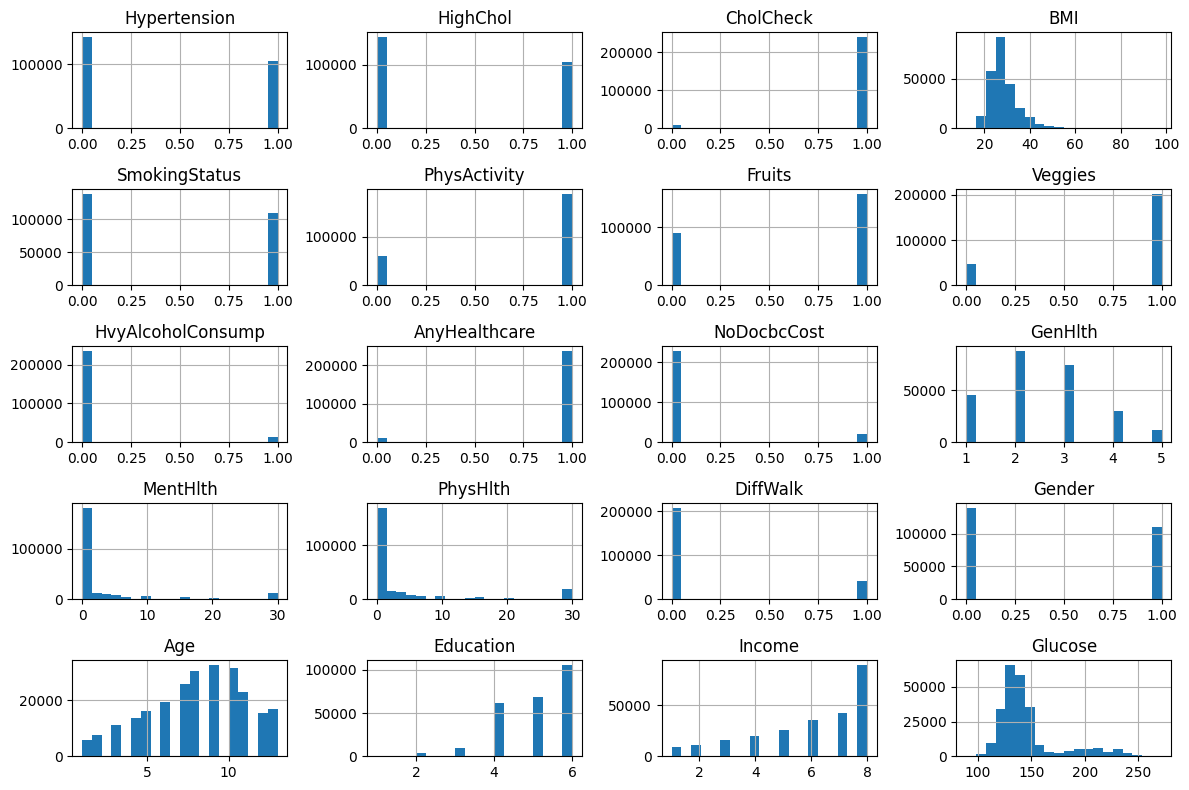

In [ ]:
X.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

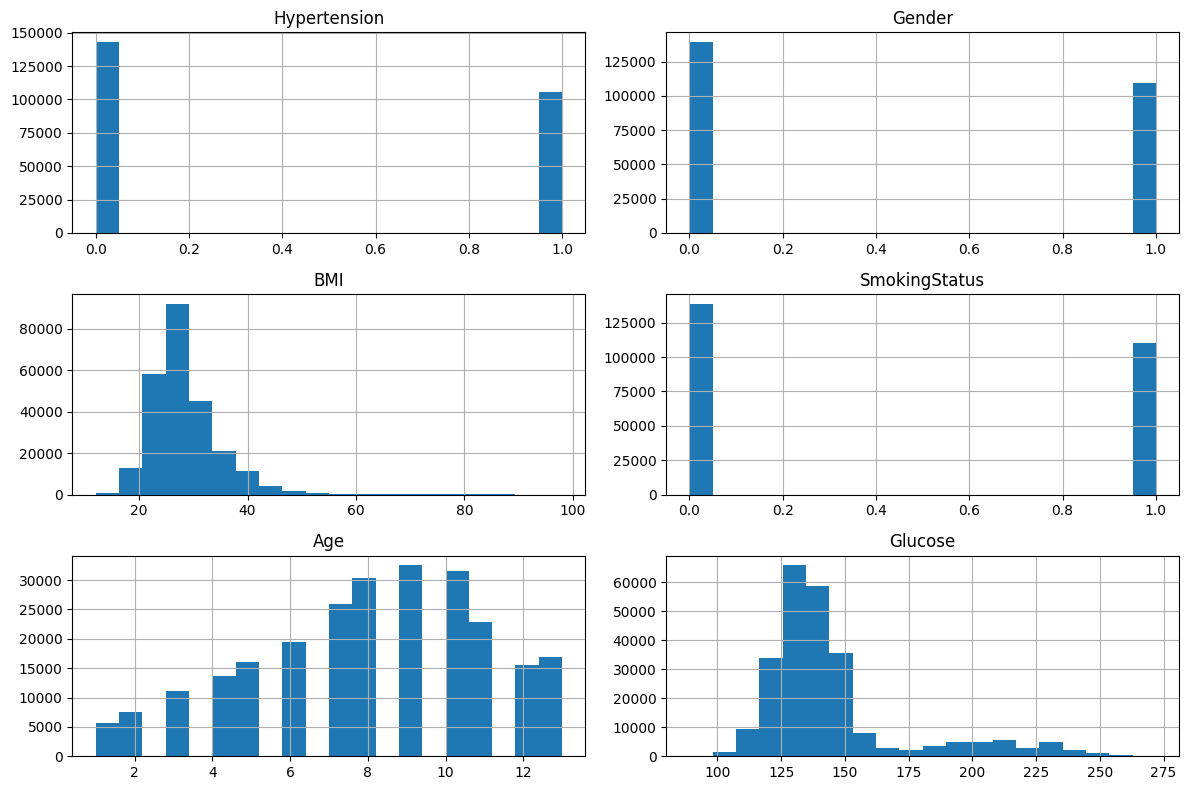

In [ ]:
X2.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Penanganan Data Imbalance

## 1

SMOTE per label

In [ ]:
X_balanced_list = []
y_balanced_list = []

min_class_len = []

SMOTE untuk setiap label, dan catat jumlah minimum antar kelas

In [ ]:
for col in target_columns:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y[col])

    # Cari jumlah terkecil antara kelas 0 dan 1
    count_0 = (y_res == 0).sum()
    count_1 = (y_res == 1).sum()
    min_len = min(count_0, count_1)
    min_class_len.append(min_len)

    # Simpan hasil SMOTE sementara
    X_balanced_list.append(X_res)
    y_balanced_list.append(y_res)

Ambil jumlah minimum per label setelah SMOTE dan potong ke jumlah itu per kelas

In [ ]:
# Cari min_len global dari hasil SMOTE per label
min_len_global = min(
    min((y_res == 0).sum(), (y_res == 1).sum())
    for y_res in y_balanced_list
)

# Inisialisasi ulang untuk final list
final_X_list = []
final_y_list = []

for i in range(len(target_columns)):
    X_res = X_balanced_list[i]
    y_res = y_balanced_list[i]

    # Ambil indeks 0 dan 1 sesuai jumlah min_len_global
    idx_0 = np.where(y_res == 0)[0][:min_len_global]
    idx_1 = np.where(y_res == 1)[0][:min_len_global]
    selected_idx = np.concatenate([idx_0, idx_1])

    final_X_list.append(X_res.iloc[selected_idx])
    final_y_list.append(y_res.iloc[selected_idx])


Menggabungkan semuanya dan konversi ke DF

In [ ]:
X_final = final_X_list[0]
y_final = np.column_stack(final_y_list)

X = pd.DataFrame(X_final, columns=X.columns)
y = pd.DataFrame(y_final, columns=target_columns)

In [ ]:
X

,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,1.0,1.000000,1.0,40.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,0.0,5.000000,18.000000,15.000000,1.000000,0.0,9.000000,4.000000,3.000000,132
1,0.0,0.000000,0.0,25.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,3.000000,0.000000,0.000000,0.000000,0.0,7.000000,6.000000,1.000000,141
2,1.0,1.000000,1.0,28.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,5.000000,30.000000,30.000000,1.000000,0.0,9.000000,4.000000,8.000000,128
3,1.0,0.000000,1.0,27.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,2.000000,0.000000,0.000000,0.000000,0.0,11.000000,3.000000,6.000000,138
4,1.0,1.000000,1.0,24.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,2.000000,3.000000,0.000000,0.000000,0.0,11.000000,5.000000,4.000000,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439518,1.0,1.000000,1.0,36.074042,1.000000,1.000000,0.000000,0.925958,0.0,1.0,0.0,3.925958,0.925958,15.000000,0.074042,1.0,9.074042,4.925958,5.074042,130
439519,1.0,0.890237,1.0,35.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,3.890237,4.890237,124
439520,1.0,1.000000,1.0,34.231801,0.768199,1.000000,0.768199,0.000000,0.0,1.0,0.0,3.463602,4.768199,10.000000,1.000000,0.0,8.463602,4.768199,2.768199,223
439521,1.0,1.000000,1.0,25.561026,0.000000,0.000000,0.000000,0.520342,0.0,1.0,0.0,3.479658,2.000000,10.000000,0.000000,0.0,8.959316,6.000000,8.000000,119


Pembulatan Nilai

In [ ]:
# List variabel (kolom) yang akan dikecualikan dari pembulatan
exclude_cols = ['Glucose']

# Identifikasi kolom numerik yang akan dibulatkan
numeric_cols_to_round = [col for col in X.select_dtypes(include=np.number).columns if col not in exclude_cols]

# Bulatkan kolom numerik yang terpilih menjadi 0 angka desimal
for col in numeric_cols_to_round:
    X[col] = X[col].round(0) # Perubahan di sini: .round(0)

# Tentukan kolom-kolom float yang ingin diubah menjadi int
cols_to_convert = numeric_cols_to_round

# Lakukan perubahan tipe data
for col in cols_to_convert:
    # Pastikan tidak ada NaN atau isi NaN jika perlu (misal dengan 0)
    # Jika Anda yakin tidak ada NaN, baris di bawah ini bisa diabaikan
    # df[col] = df[col].fillna(0) # Contoh: mengisi NaN dengan 0

    X[col] = X[col].astype(int)

print("\nDataFrame setelah pembulatan menjadi 0 angka desimal:")
X


DataFrame setelah pembulatan menjadi 0 angka desimal:


,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,1,1,1,40,1,0,0,1,0,1,0,5,18,15,1,0,9,4,3,132
1,0,0,0,25,1,1,0,0,0,0,1,3,0,0,0,0,7,6,1,141
2,1,1,1,28,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,128
3,1,0,1,27,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,138
4,1,1,1,24,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439518,1,1,1,36,1,1,0,1,0,1,0,4,1,15,0,1,9,5,5,130
439519,1,1,1,35,0,1,1,1,0,1,0,3,0,0,0,0,12,4,5,124
439520,1,1,1,34,1,1,1,0,0,1,0,3,5,10,1,0,8,5,3,223
439521,1,1,1,26,0,0,0,1,0,1,0,3,2,10,0,0,9,6,8,119


In [ ]:
# Saring kolom yang dikecualikan
cols_to_convert_to_cat = ['Hypertension', 'HighChol', 'CholCheck', 'Gender', 'Education', 'SmokingStatus', 'Income', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk']

print(f"\nKolom yang akan diubah ke 'category': {cols_to_convert_to_cat}")

# --- Lakukan perubahan tipe data ---
for col in cols_to_convert_to_cat:
    X[col] = X[col].astype('category')

print("\nX Info:", X.info())
X


Kolom yang akan diubah ke 'category': ['Hypertension', 'HighChol', 'CholCheck', 'Gender', 'Education', 'SmokingStatus', 'Income', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk']
<class 'pandas.core.frame.DataFrame'>
Index: 427406 entries, 0 to 439522
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Hypertension       427406 non-null  category
 1   HighChol           427406 non-null  category
 2   CholCheck          427406 non-null  category
 3   BMI                427406 non-null  int64   
 4   SmokingStatus      427406 non-null  category
 5   PhysActivity       427406 non-null  category
 6   Fruits             427406 non-null  category
 7   Veggies            427406 non-null  category
 8   HvyAlcoholConsump  427406 non-null  category
 9   AnyHealthcare      427406 non-null  category
 10  NoDocbcCost        427406 non-null  category


,Hypertension,HighChol,CholCheck,BMI,SmokingStatus,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,Age,Education,Income,Glucose
0,1,1,1,40,1,0,0,1,0,1,0,5,18,15,1,0,9,4,3,132
1,0,0,0,25,1,1,0,0,0,0,1,3,0,0,0,0,7,6,1,141
2,1,1,1,28,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,128
3,1,0,1,27,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,138
4,1,1,1,24,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439518,1,1,1,36,1,1,0,1,0,1,0,4,1,15,0,1,9,5,5,130
439519,1,1,1,35,0,1,1,1,0,1,0,3,0,0,0,0,12,4,5,124
439520,1,1,1,34,1,1,1,0,0,1,0,3,5,10,1,0,8,5,3,223
439521,1,1,1,26,0,0,0,1,0,1,0,3,2,10,0,0,9,6,8,119


Cek distribusi tiap label

In [ ]:
for col in y.columns:
    print(f"Label '{col}' value counts:")
    print(y[col].value_counts())
    print()

Label 'HeartDisease' value counts:
HeartDisease
0.0    213703
1.0    213703
Name: count, dtype: int64

Label 'Stroke' value counts:
Stroke
0.0    213703
1.0    213703
Name: count, dtype: int64

Label 'Diabetes' value counts:
Diabetes
0.0    213703
1.0    213703
Name: count, dtype: int64



In [ ]:
print("\nX Info:", y.info())
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427406 entries, 0 to 427405
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   HeartDisease  427406 non-null  float64
 1   Stroke        427406 non-null  float64
 2   Diabetes      427406 non-null  float64
dtypes: float64(3)
memory usage: 9.8 MB

X Info: None


,HeartDisease,Stroke,Diabetes
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
427401,1.0,1.0,1.0
427402,1.0,1.0,1.0
427403,1.0,1.0,1.0
427404,1.0,1.0,1.0


In [ ]:
# Saring kolom yang dikecualikan
cols_to_convert_to_int = y.columns
print(f"\nKolom yang akan diubah ke 'integer': {cols_to_convert_to_int}")

# --- Lakukan perubahan tipe data ---
for col in cols_to_convert_to_int:
    y[col] = y[col].astype('int')

print("\nX Info:", y.info())
y


Kolom yang akan diubah ke 'integer': Index(['HeartDisease', 'Stroke', 'Diabetes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427406 entries, 0 to 427405
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   HeartDisease  427406 non-null  int64
 1   Stroke        427406 non-null  int64
 2   Diabetes      427406 non-null  int64
dtypes: int64(3)
memory usage: 9.8 MB

X Info: None


,HeartDisease,Stroke,Diabetes
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
427401,1,1,1
427402,1,1,1
427403,1,1,1
427404,1,1,1


# Penanganan Nilai Hilang, Encoding, dan Scaling Menggunakan Pipeline

In [ ]:
# Penanganan Nilai Hilang, Encoding, dan Scaling Menggunakan Pipeline ---

# Identifikasi kolom kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Buat pipeline preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# # Pemisahan Data Latih dan Uji ---
# X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)

# print("\nBentuk X_train:", X_train2.shape)
# print("Bentuk X_test:", X_test2.shape)
# print("Bentuk y_train:", y_train.shape)
# print("Bentuk y_test:", y_test.shape)

In [ ]:
# X_train2

In [ ]:
# Pemisahan Data Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nBentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)


Bentuk X_train: (341924, 20)
Bentuk X_test: (85482, 20)
Bentuk y_train: (341924, 3)
Bentuk y_test: (85482, 3)


# Pembangunan Model Multi-output Classification

In [ ]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

## RandomForest

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
# Menggunakan RandomForestClassifier sebagai base estimator
# MultiOutputClassifier akan melatih satu classifier untuk setiap target
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))])

# Atau menggunakan GradientBoostingClassifier
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('classifier', MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42)))])


In [ ]:
print("\nMemulai pelatihan model...")
model.fit(X_train, y_train)
print("Pelatihan model selesai.")


Memulai pelatihan model...
Pelatihan model selesai.


In [ ]:
import pickle
import tensorflowjs as tfjs

# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/rf1")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/rf1.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/rf1.keras")

# Simpan model format TFLite
converter1 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/rf1")
tflite_model1 = converter1.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/rf1.tflite", "wb") as f:
    f.write(tflite_model1)

# Simpan History Model
# with open("/content/drive/My Drive/Capstone LaskarAI/rf1.pkl", "wb") as f:
#    pickle.dump(history.history, f)

# Simpan model format tensorflow.js
tfjs1_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/rf1"
tfjs.converters.save_keras_model(model, tfjs1_path)
print("TensorFlow.js model saved successfully")

AttributeError: 'Pipeline' object has no attribute 'export'

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted = np.array([pred[:, 1] for pred in y_pred_proba]).T


In [ ]:
print("\nMemulai pelatihan model...")
model2.fit(X_train2, y_train)
print("Pelatihan model selesai.")


Memulai pelatihan model...


NameError: name 'X_train2' is not defined

In [ ]:
y_pred2 = model2.predict(X_test2)
y_pred_proba2 = model2.predict_proba(X_test2) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted2 = np.array([pred[:, 1] for pred in y_pred_proba2]).T

### Evaluasi Model

In [ ]:
print("\n--- Evaluasi Model ---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro = np.mean([f1_score(y_test.iloc[:, i], y_pred[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro:.4f}")


--- Evaluasi Model ---

Evaluasi untuk HeartDisease:
Akurasi: 0.9901
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    155034
           1       0.99      0.99      0.99    155035

    accuracy                           0.99    310069
   macro avg       0.99      0.99      0.99    310069
weighted avg       0.99      0.99      0.99    310069

ROC AUC: 0.9994

Evaluasi untuk Stroke:
Akurasi: 0.9928
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    155033
           1       1.00      0.99      0.99    155036

    accuracy                           0.99    310069
   macro avg       0.99      0.99      0.99    310069
weighted avg       0.99      0.99      0.99    310069

ROC AUC: 0.9991

Evaluasi untuk Diabetes:
Akurasi: 0.9997
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00 

In [ ]:
print("\n--- Evaluasi Model RF 2---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred2[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred2[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted2[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro2 = np.mean([f1_score(y_test.iloc[:, i], y_pred2[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro2:.4f}")

### Inferences

In [ ]:
# --- 10. Prediksi untuk Data Baru (Contoh) ---
print("\n--- Contoh Prediksi Data Baru ---")

# Buat contoh data baru dengan struktur kolom yang sama seperti X_train
# Nilai-nilai ini HANYA CONTOH. Anda harus menggantinya dengan data nyata.
new_data = pd.DataFrame([{
    'age': 55,
    'sex': 'Female',
    'bmi': 28.5,
    'smoking_history': 'never smoked',
    'hypertension': 0,
    'heart_disease': 0, # Ini akan diabaikan sebagai fitur, tetapi penting untuk struktur dataframe
    'stroke': 0,       # Ini akan diabaikan sebagai fitur
    'diabetes': 0,     # Ini akan diabaikan sebagai fitur
    'cholesterol': 200,
    'blood_glucose_level': 100,
    'physactivity': 1,
    'fruits': 1,
    'veggies': 1,
    'hvyalcoholconsump': 0,
    'anyhealthcare': 1,
    'nodocbccare': 0,
    'genhlth': 3, # Skala 1-5 (1=Excellent, 5=Poor)
    'menthlth': 0, # Jumlah hari mental health buruk
    'physhlth': 0, # Jumlah hari fisik health buruk
    'diffwalk': 0, # Sulit jalan
    'race': 'White',
    'ever_married': 'Yes',
    'work_type': 'Private',
    'residence_type': 'Urban',
    'avg_glucose_level': 100,
    'cholesterol_high': 0 # Contoh fitur lain yang mungkin ada dari dataset lain
}], columns=features_columns) # Pastikan kolom sesuai dengan X_train

# Lakukan prediksi
risk_predictions = model.predict(new_data)
risk_probabilities = model.predict_proba(new_data)

print("\nPrediksi Risiko:")
for i, target in enumerate(target_columns):
    print(f"Risiko {target}: {'Tinggi' if risk_predictions[0, i] == 1 else 'Rendah'} "
          f"(Probabilitas: {risk_probabilities[i][0, 1]:.4f})") # Probabilitas kelas positif


## RegLog

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = MultiOutputClassifier(LogisticRegression()).fit(X_train2, y_train)
clf.predict(X_test2)

In [ ]:
model3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(LogisticRegression()))])
model3.fit(X_train2, y_train)

In [ ]:
y_pred3 = model3.predict(X_test2)
y_pred_proba3 = model3.predict_proba(X_test2) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted3 = np.array([pred[:, 1] for pred in y_pred_proba3]).T

In [ ]:
y_pred3 = clf.predict(X_test2)

In [ ]:
print("\n--- Evaluasi Model ---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred3[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred3[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted3[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro3 = np.mean([f1_score(y_test.iloc[:, i], y_pred3[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro2:.4f}")

In [ ]:
print("\n--- Evaluasi Model RegLog 1---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred3[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred3[:, i])}")


# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro = np.mean([f1_score(y_test.iloc[:, i], y_pred3[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro:.4f}")

## Xtra Tree

In [ ]:
from sklearn.tree import ExtraTreeClassifier
# Menggunakan RandomForestClassifier sebagai base estimator
# MultiOutputClassifier akan melatih satu classifier untuk setiap target
model4 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(ExtraTreeClassifier()))])
model4.fit(X_train2, y_train)

In [ ]:
y_pred4 = model4.predict(X_test2)
y_pred_proba4 = model4.predict_proba(X_test2) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted4 = np.array([pred[:, 1] for pred in y_pred_proba4]).T

In [ ]:
print("\n--- Evaluasi Model ---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred4[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred4[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted4[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro4 = np.mean([f1_score(y_test.iloc[:, i], y_pred4[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro4:.4f}")

## MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
# Menggunakan RandomForestClassifier sebagai base estimator
# MultiOutputClassifier akan melatih satu classifier untuk setiap target
model5 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MultiOutputClassifier(MLPClassifier()))])
model5.fit(X_train2, y_train)

In [ ]:
y_pred5 = model5.predict(X_test2)
y_pred_proba5 = model5.predict_proba(X_test2) # Untuk ROC AUC

# Mengubah y_pred_proba menjadi format yang dapat digunakan oleh roc_auc_score
# predict_proba mengembalikan daftar array untuk setiap target
# Misalnya: [array([[0.9, 0.1], ...]), array([[0.8, 0.2], ...]), ...]
# Kita perlu mengambil probabilitas kelas positif (indeks 1) untuk setiap target
y_pred_proba_formatted5 = np.array([pred[:, 1] for pred in y_pred_proba5]).T

In [ ]:
print("\n--- Evaluasi Model ---")

# Akurasi per target
for i, target in enumerate(target_columns):
    print(f"\nEvaluasi untuk {target}:")
    print(f"Akurasi: {accuracy_score(y_test.iloc[:, i], y_pred5[:, i]):.4f}")
    print(f"Laporan Klasifikasi:\n{classification_report(y_test.iloc[:, i], y_pred5[:, i])}")
    try:
        # ROC AUC hanya untuk kelas biner
        if len(y_test.iloc[:, i].unique()) == 2:
            roc_auc = roc_auc_score(y_test.iloc[:, i], y_pred_proba_formatted5[:, i])
            print(f"ROC AUC: {roc_auc:.4f}")
        else:
            print("ROC AUC tidak berlaku untuk target non-biner.")
    except ValueError as e:
        print(f"Tidak dapat menghitung ROC AUC untuk {target}: {e}")

# Evaluasi keseluruhan (misalnya, rerata metrik)
# Ini bisa lebih kompleks dan tergantung pada bagaimana Anda ingin menimbang setiap target
print("\n--- Evaluasi Keseluruhan (Rata-rata Makro) ---")
# Misalnya, F1-score rata-rata makro
f1_macro5 = np.mean([f1_score(y_test.iloc[:, i], y_pred5[:, i], average='macro') for i in range(len(target_columns))])
print(f"Rata-rata F1-score (Makro): {f1_macro5:.4f}")

## Lazy

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train2, X_test2, y_train, y_test)
models

# Pembangunan Model Multi-output Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 2. Preprocessing Data ---
# Identifikasi kolom numerik dan kategori
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()


# --- Buat Preprocessing Pipeline ---
# Pipeline untuk fitur numerik: Imputasi Mean -> Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal: Imputasi Most Frequent -> One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# --- One-Hot Encode Target Variables secara terpisah ---
y_encoded_list = []
num_classes_per_target = []
target_encoders = {}
for target_col in targets:
    num_classes = y[target_col].nunique()
    print(f"Target '{target_col}': {num_classes} unique classes.")
    if num_classes < 2:
        # Jika target biner (0 atau 1) tetapi hanya ada 1 nilai unik di data,
        # paksa OneHotEncoder untuk menghasilkan 2 kolom (untuk 0 dan 1).
        # Ini hanya jika Anda yakin target memang biner.
        encoder = OneHotEncoder(sparse_output=False, categories=[[0, 1]])
    else:
        encoder = OneHotEncoder(sparse_output=False, categories='auto')

    y_encoded_list.append(encoder.fit_transform(y[[target_col]]))
    num_classes_per_target.append(encoder.categories_[0].shape[0]) # Ambil jumlah kelas yang dihasilkan encoder
    target_encoders[target_col] = encoder

print(f"Jumlah kelas per target yang dihasilkan oleh encoder: {num_classes_per_target}")


# --- Split Data (Training dan Testing) ---
# Gunakan operator * untuk membongkar list y_encoded_list menjadi argumen terpisah
# train_test_split akan mengembalikan tuple panjang, jadi sesuaikan penerimaannya
X_train_raw, X_test_raw, *y_splits = train_test_split(
    X, *y_encoded_list, test_size=0.2, random_state=42
)

# y_splits akan berisi list yang alternating antara train dan test untuk setiap target
# Contoh: [y1_train, y1_test, y2_train, y2_test, y3_train, y3_test]
# Kita perlu mengorganisirnya kembali

y_train_list = []
y_test_list = []
for i in range(len(targets)):
    y_train_list.append(y_splits[i*2])     # 0, 2, 4
    y_test_list.append(y_splits[i*2 + 1]) # 1, 3, 5

# --- Terapkan preprocessing pada X ---
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

print(f"Shape X_train_processed: {X_train_processed.shape}")
print(f"Shape X_test_processed: {X_test_processed.shape}")

print("\nShape of y_train_list elements (after split):")
for i, y_arr in enumerate(y_train_list):
    print(f"  y_train_list[{i}] (for {targets[i]}): {y_arr.shape}")

print("\nShape of y_test_list elements (after split):")
for i, y_arr in enumerate(y_test_list):
    print(f"  y_test_list[{i}] (for {targets[i]}): {y_arr.shape}")

print(f"Shape X_train_processed: {X_train_processed.shape}")
print(f"Shape X_test_processed: {X_test_processed.shape}")
print(f"Jumlah kelas per target: {num_classes_per_target}")

Target 'HeartDisease': 2 unique classes.
Target 'Stroke': 2 unique classes.
Target 'Diabetes': 2 unique classes.
Jumlah kelas per target yang dihasilkan oleh encoder: [2, 2, 2]
Shape X_train_processed: (1240275, 48)
Shape X_test_processed: (310069, 48)

Shape of y_train_list elements (after split):
  y_train_list[0] (for HeartDisease): (1240275, 2)
  y_train_list[1] (for Stroke): (1240275, 2)
  y_train_list[2] (for Diabetes): (1240275, 2)

Shape of y_test_list elements (after split):
  y_test_list[0] (for HeartDisease): (310069, 2)
  y_test_list[1] (for Stroke): (310069, 2)
  y_test_list[2] (for Diabetes): (310069, 2)
Shape X_train_processed: (1240275, 48)
Shape X_test_processed: (310069, 48)
Jumlah kelas per target: [2, 2, 2]


## MNN 1

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550344 entries, 0 to 1550343
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   Hypertension       1550344 non-null  category
 1   HighChol           1550344 non-null  category
 2   CholCheck          1550344 non-null  category
 3   BMI                1550344 non-null  int64   
 4   SmokingStatus      1550344 non-null  category
 5   PhysActivity       1550344 non-null  category
 6   Fruits             1550344 non-null  category
 7   Veggies            1550344 non-null  category
 8   HvyAlcoholConsump  1550344 non-null  category
 9   AnyHealthcare      1550344 non-null  category
 10  NoDocbcCost        1550344 non-null  category
 11  GenHlth            1550344 non-null  category
 12  MentHlth           1550344 non-null  int64   
 13  PhysHlth           1550344 non-null  int64   
 14  DiffWalk           1550344 non-null  category
 15  Gender         

In [ ]:
X.select_dtypes(include=['category', 'bool']).columns

Index(['Hypertension', 'HighChol', 'CholCheck', 'SmokingStatus',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Gender',
       'Education', 'Income'],
      dtype='object')

In [ ]:
X.select_dtypes(include=np.number).columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Glucose'], dtype='object')

In [ ]:
targets = y.columns
print(targets)

Index(['HeartDisease', 'Stroke', 'Diabetes'], dtype='object')


In [ ]:
# --- 2. Preprocessing Data ---
# Identifikasi kolom numerik dan kategori
categorical_cols = X.select_dtypes(include=['category', 'bool']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data X dan y terlebih dahulu
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Terapkan preprocessing pada X
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

# One-hot encode target variables separately for train and test sets
y_train_list = []
y_test_list = []
num_classes_per_target = []

for target_col in targets:
    # Ambil nilai unik dari target untuk menentukan jumlah kelas
    num_classes = y_train_raw[target_col].nunique() # Use train data to determine classes
    num_classes_per_target.append(num_classes)
    # Lakukan one-hot encoding
    # encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Add handle_unknown for consistency
    y_train_list.append(y_train_raw[[target_col]])
    y_test_list.append(y_test_raw[[target_col]]) # Use transform on test data

# Now y_train_list and y_test_list are lists of arrays with consistent sample numbers

In [ ]:
X_train_processed

array([[-0.29016453,  3.1693375 , -0.70696706, ...,  1.        ,
         0.        ,  0.        ],
       [-0.81638072, -0.36191815, -0.70696706, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23605166, -0.36191815, -0.70696706, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.23605166, -0.36191815, -0.70696706, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99178612, -0.36191815, -0.70696706, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.41145706, -0.36191815, -0.70696706, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
y_train_raw

,HeartDisease,Stroke,Diabetes
206937,0,0,0
135476,0,0,0
580347,0,1,0
218397,0,0,0
209143,0,0,0
...,...,...,...
259178,0,0,1
1414414,1,1,1
131932,0,0,0
671155,0,1,1


In [ ]:
y_train_list

[         HeartDisease
 206937              0
 135476              0
 580347              0
 218397              0
 209143              0
 ...               ...
 259178              0
 1414414             1
 131932              0
 671155              0
 121958              0
 
 [1240275 rows x 1 columns],
          Stroke
 206937        0
 135476        0
 580347        1
 218397        0
 209143        0
 ...         ...
 259178        0
 1414414       1
 131932        0
 671155        1
 121958        0
 
 [1240275 rows x 1 columns],
          Diabetes
 206937          0
 135476          0
 580347          0
 218397          0
 209143          0
 ...           ...
 259178          1
 1414414         1
 131932          0
 671155          1
 121958          0
 
 [1240275 rows x 1 columns]]

In [ ]:
# --- 3. Membangun Model Multiclass/Multioutput dengan TensorFlow ---

# Definisikan input layer
input_shape = X_train_processed.shape[1]
input_layer = Input(shape=(input_shape,), name='input_features')

# Hidden layers
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)

# Output layers for each target variable
# Penting: Pastikan jumlah unit di setiap output layer sesuai dengan jumlah kelas untuk target tersebut
# dan gunakan activation='softmax' untuk klasifikasi multiclass.
output_layers = []
for i, num_classes in enumerate(num_classes_per_target):
    output_layer = Dense(num_classes, activation='softmax', name=f'output_target_{i+1}')(x)
    output_layers.append(output_layer)

# Buat model
model = Model(inputs=input_layer, outputs=output_layers)

In [ ]:
# --- 4. Compile Model ---

# Definisikan loss function dan metrics untuk setiap output
# CategoricalCrossentropy cocok untuk one-hot encoded targets
# CategoricalAccuracy juga cocok
losses = {}
metrics = {}
for i, _ in enumerate(targets):
    losses[f'output_target_{i+1}'] = CategoricalCrossentropy()
    metrics[f'output_target_{i+1}'] = CategoricalAccuracy(name=f'accuracy_target_{i+1}')

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=losses,
              metrics=metrics)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 48)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      6,272 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_1     │ (None, 2)         │        130 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_2     │ (None, 2)         │        130 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_3     │ (None, 2)         │        130 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,918 (58.27 KB)

 Trainable params: 14,918 (58.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- 5. Latih Model ---

# Format y_train_list dan y_test_list untuk feed ke model
# y_train_list adalah list of arrays, kita perlu mengubahnya menjadi dictionary
# dengan nama output layer sebagai kunci
y_train_dict = {f'output_target_{i+1}': y_train_list[i] for i in range(len(y_train_list))}
y_test_dict = {f'output_target_{i+1}': y_test_list[i] for i in range(len(y_test_list))}


history = model.fit(X_train_processed, y_train_dict,
                    epochs=50,  # Sesuaikan jumlah epoch
                    batch_size=32,
                    validation_data=(X_test_processed, y_test_dict))

Epoch 1/50
10686/10686 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 1.2991 - output_target_1_accuracy_target_1: 0.8018 - output_target_1_loss: 0.4335 - output_target_2_accuracy_target_2: 0.8016 - output_target_2_loss: 0.4323 - output_target_3_accuracy_target_3: 0.8006 - output_target_3_loss: 0.4334 - val_loss: 1.1370 - val_output_target_1_accuracy_target_1: 0.8292 - val_output_target_1_loss: 0.3794 - val_output_target_2_accuracy_target_2: 0.8286 - val_output_target_2_loss: 0.3789 - val_output_target_3_accuracy_target_3: 0.8295 - val_output_target_3_loss: 0.3786
Epoch 2/50
10686/10686 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 1.0870 - output_target_1_accuracy_target_1: 0.8388 - output_target_1_loss: 0.3625 - output_target_2_accuracy_target_2: 0.8392 - output_target_2_loss: 0.3621 - output_target_3_accuracy_target_3: 0.8388 - output_target_3_loss: 0.3623 - val_loss: 0.9985 - val_output_target_1_accuracy_target_1: 0.8556 - val_output_target_1_loss: 0.3325 - val_output_target_2_accuracy_targe

In [ ]:
import pickle
import tensorflowjs as tfjs

In [ ]:
import pickle
import tensorflowjs as tfjs

# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1.keras")

# Simpan model format TFLite
converter1 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1")
tflite_model1 = converter1.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/mnn1.tflite", "wb") as f:
    f.write(tflite_model1)

# Simpan History Model
with open("/content/drive/My Drive/Capstone LaskarAI/mnn1.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model format tensorflow.js
tfjs1_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/mnn1"
tfjs.converters.save_keras_model(model, tfjs1_path)
print("TensorFlow.js model saved successfully")

Saved artifact at '/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48), dtype=tf.float32, name='input_features')
Output Type:
  List[TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)]
Captures:
  140189618395408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290958288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290961360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290958672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290961936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290965776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290961744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140182290956560: TensorSpec(shape=(), dtype=tf.resource, name=None)

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved successfully


In [ ]:
import os

# Buat direktori untuk menyimpan model jika belum ada
model_save_dir = "/content/drive/My Drive/Capstone LaskarAI/saved_model"
os.makedirs(model_save_dir, exist_ok=True)

# Simpan model dalam format SavedModel (rekomendasi TensorFlow)
model_path = os.path.join(model_save_dir, 'multioutput_classification_model1')
model.save(model_path)
print(f"\nModel berhasil disimpan di: {model_path}")

# Jika Anda ingin memuat kembali model:
# loaded_model = tf.keras.models.load_model(model_path)
# print("Model berhasil dimuat kembali.")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/My Drive/Capstone LaskarAI/saved_model/multioutput_classification_model1.

In [ ]:
# --- 6. Evaluasi Model ---
print("\nEvaluasi Model pada Data Uji:")
evaluation_results = model.evaluate(X_test_processed, y_test_dict, verbose=0)

# Hasil evaluasi akan menjadi list, urutan sesuai dengan compile metrics
print(f"Total Loss: {evaluation_results[0]:.4f}")
# Cetak metrik untuk setiap output
for i in range(len(targets)):
    print(f"  Target {i+1} Loss: {evaluation_results[i+1]:.4f}")
    print(f"  Target {i+1} Accuracy: {evaluation_results[i+1+len(targets)]:.4f}") # Perhatikan indeksnya



Evaluasi Model pada Data Uji:
Total Loss: 0.4983
  Target 1 Loss: 0.1661
  Target 1 Accuracy: 0.9385
  Target 2 Loss: 0.1661
  Target 2 Accuracy: 0.9385
  Target 3 Loss: 0.1661
  Target 3 Accuracy: 0.9385


In [ ]:
# --- 7. Membuat Prediksi ---
print("\nMembuat Prediksi:")
predictions = model.predict(X_test_processed[:5]) # Prediksi untuk 5 sampel pertama

# Prediksi akan berupa list of arrays, satu array untuk setiap output
for i, pred_output in enumerate(predictions):
    print(f"Prediksi untuk Target {i+1} (5 sampel pertama):")
    # Untuk klasifikasi, Anda mungkin ingin mendapatkan kelas prediksi (indeks dengan probabilitas tertinggi)
    predicted_classes = np.argmax(pred_output, axis=1)
    print(predicted_classes)
    print("-" * 30)

In [ ]:
# Plotting history (opsional)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada test set
y_train_dict = {
    'heart_disease': y_train['HeartDisease'].values,
    'stroke': y_train['Stroke'].values,
    'diabetes': y_train['Diabetes'].values
}
y_test_dict = {
    'heart_disease': y_test['HeartDisease'].values,
    'stroke': y_test['Stroke'].values,
    'diabetes': y_test['Diabetes'].values
}

# Convert X_test to a NumPy array
X_test_array = X_test.values

# Evaluate the model using a list of target arrays and the NumPy array of features
# The order of target arrays should match the order of outputs in the model: Diabetes, HeartDisease, Stroke
loss, diabetes_loss, heart_loss, stroke_loss, diabetes_acc, heart_acc, stroke_acc = model.evaluate(
    X_test_array,
    [y_test_dict['diabetes'], y_test_dict['heart_disease'], y_test_dict['stroke']],
    verbose=0
)

print(f"\nTotal Test Loss: {loss:.4f}")
print("\n--- Evaluasi untuk Heart Disease ---")
print(f"Loss: {heart_loss:.4f}")
print(f"Accuracy: {heart_acc:.4f}")


print("\n--- Evaluasi untuk Stroke ---")
print(f"Loss: {stroke_loss:.4f}")
print(f"Accuracy: {stroke_acc:.4f}")


print("\n--- Evaluasi untuk Diabetes ---")
print(f"Loss: {diabetes_loss:.4f}")
print(f"Accuracy: {diabetes_acc:.4f}")

# ROC AUC can be calculated separately if needed
# For calculating AUC, you would typically predict probabilities and then use sklearn's roc_auc_score
# y_pred_prob = model.predict(X_test_array) # Use the NumPy array for prediction as well
# heart_auc = roc_auc_score(y_test['HeartDisease'].values, y_pred_prob[1]) # Index 1 for Heart Disease output
# stroke_auc = roc_auc_score(y_test['Stroke'].values, y_pred_prob[2]) # Index 2 for Stroke output
# diabetes_auc = roc_auc_score(y_test['Diabetes'].values, y_pred_prob[0]) # Index 0 for Diabetes output

# print(f"Heart Disease AUC: {heart_auc:.4f}")
# print(f"Stroke AUC: {stroke_auc:.4f}")
# print(f"Diabetes AUC: {diabetes_auc:.4f}")

## MNN 2

In [ ]:
targets = y.columns
print(targets)

Index(['HeartDisease', 'Stroke', 'Diabetes'], dtype='object')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping

# --- Definisikan Input Layer ---
input_shape = X_train_processed.shape[1]
input_layer = Input(shape=(input_shape,), name='input_features')

# --- Hidden Layers dengan Dropout ---
x = Dense(256, activation='relu')(input_layer)
x = Dropout(0.3)(x) # Dropout dengan probabilitas 30%
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# --- Output Layers untuk Setiap Target ---
output_layers = []
for i, num_classes in enumerate(num_classes_per_target):
    output_layer = Dense(num_classes, activation='softmax', name=f'output_target_{i+1}')(x)
    output_layers.append(output_layer)

# --- Buat Model ---
model = Model(inputs=input_layer, outputs=output_layers)

# --- Compile Model ---
losses = {f'output_target_{i+1}': CategoricalCrossentropy() for i in range(len(targets))}
metrics = {f'output_target_{i+1}': CategoricalAccuracy(name=f'accuracy_target_{i+1}') for i in range(len(targets))}

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=losses,
              metrics=metrics)

model.summary()

# --- Callback Early Stopping ---
# Monitor 'val_loss' (loss pada data validasi)
# patience=10 berarti akan berhenti jika val_loss tidak membaik selama 10 epoch berturut-turut
# restore_best_weights=True akan mengembalikan bobot model dari epoch terbaik
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# --- Format y_train_list dan y_test_list untuk feed ke model ---
# Access elements of y_train_list and y_test_list using their index i
y_train_dict = {f'output_target_{i+1}': y_train_list[i] for i in range(len(y_train_list))}
y_test_dict = {f'output_target_{i+1}': y_test_list[i] for i in range(len(y_test_list))}


# --- Latih Model ---
history = model.fit(X_train_processed, y_train_dict,
                    epochs=100, # Set epoch lebih tinggi karena Early Stopping akan menghentikan secara otomatis
                    batch_size=32,
                    validation_data=(X_test_processed, y_test_dict),
                    callbacks=[early_stopping], # Tambahkan callback EarlyStopping
                    verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 48)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     12,544 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_1     │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_2     │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_target_3     │ (None, 2)         │        130 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 54,086 (211.27 KB)

 Trainable params: 54,086 (211.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
38759/38759 ━━━━━━━━━━━━━━━━━━━━ 168s 4ms/step - loss: 1.0742 - output_target_1_accuracy_target_1: 0.7754 - output_target_1_loss: 0.4688 - output_target_2_accuracy_target_2: 0.6871 - output_target_2_loss: 0.5816 - output_target_3_accuracy_target_3: 0.9911 - output_target_3_loss: 0.0238 - val_loss: 0.8330 - val_output_target_1_accuracy_target_1: 0.8457 - val_output_target_1_loss: 0.3537 - val_output_target_2_accuracy_target_2: 0.7762 - val_output_target_2_loss: 0.4691 - val_output_target_3_accuracy_target_3: 0.9967 - val_output_target_3_loss: 0.0102
Epoch 2/100
38759/38759 ━━━━━━━━━━━━━━━━━━━━ 159s 4ms/step - loss: 0.9040 - output_target_1_accuracy_target_1: 0.8231 - output_target_1_loss: 0.3883 - output_target_2_accuracy_target_2: 0.7483 - output_target_2_loss: 0.5026 - output_target_3_accuracy_target_3: 0.9956 - output_target_3_loss: 0.0131 - val_loss: 0.7424 - val_output_target_1_accuracy_target_1: 0.8634 - val_output_target_1_loss: 0.3172 - val_output_target_2_accuracy_t

In [ ]:
y_train_dict

{'output_target_1':          HeartDisease
 206937              0
 135476              0
 580347              0
 218397              0
 209143              0
 ...               ...
 259178              0
 1414414             1
 131932              0
 671155              0
 121958              0
 
 [1240275 rows x 1 columns],
 'output_target_2':          Stroke
 206937        0
 135476        0
 580347        1
 218397        0
 209143        0
 ...         ...
 259178        0
 1414414       1
 131932        0
 671155        1
 121958        0
 
 [1240275 rows x 1 columns],
 'output_target_3':          Diabetes
 206937          0
 135476          0
 580347          0
 218397          0
 209143          0
 ...           ...
 259178          1
 1414414         1
 131932          0
 671155          1
 121958          0
 
 [1240275 rows x 1 columns]}

In [ ]:
# Simpan model format SavedModel
model.export("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2")

# Simpan model format HDF5
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2.h5")

# Simpan model format Keras
model.save("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2.keras")

# Simpan model format TFLite
converter2 = tf.lite.TFLiteConverter.from_saved_model("/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2")
tflite_model2 = converter2.convert()
with open("/content/drive/My Drive/Capstone LaskarAI/mnn2.tflite", "wb") as f:
    f.write(tflite_model2)

# Simpan History Model
with open("/content/drive/My Drive/Capstone LaskarAI/mnn2.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Simpan model format tensorflow.js
tfjs1_path = "/content/drive/My Drive/Capstone LaskarAI/tfjs_model/mnn2"
tfjs.converters.save_keras_model(model, tfjs1_path)
print("TensorFlow.js model saved successfully")

Saved artifact at '/content/drive/My Drive/Capstone LaskarAI/saved_model/mnn2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48), dtype=tf.float32, name='input_features')
Output Type:
  List[TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)]
Captures:
  137535193392400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193395088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193390672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193397200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193391056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193396624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193390288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137535193385104: TensorSpec(shape=(), dtype=tf.resource, name=None)

failed to lookup keras version from the file,
    this is likely a weight only file
TensorFlow.js model saved successfully


In [ ]:
import os

# Buat direktori untuk menyimpan model jika belum ada
model_save_dir = "/content/drive/My Drive/Capstone LaskarAI/saved_model"
os.makedirs(model_save_dir, exist_ok=True)

# Simpan model dalam format SavedModel (rekomendasi TensorFlow)
model_path = os.path.join(model_save_dir, 'multioutput_classification_model2')
model.save(model_path)
print(f"\nModel berhasil disimpan di: {model_path}")

# Jika Anda ingin memuat kembali model:
# loaded_model = tf.keras.models.load_model(model_path)
# print("Model berhasil dimuat kembali.")


=== Evaluasi Model pada Data Uji ===
Total Loss: 0.5069
  Target 1 Loss: 0.2274
  Target 1 Accuracy: 0.9090
  Target 2 Loss: 0.2738
  Target 2 Accuracy: 0.8945
  Target 3 Loss: 0.0056
  Target 3 Accuracy: 0.9980
9690/9690 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step

--- Metrik Evaluasi untuk Target: HeartDisease ---

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91    154913
           1       0.89      0.93      0.91    155156

    accuracy                           0.91    310069
   macro avg       0.91      0.91      0.91    310069
weighted avg       0.91      0.91      0.91    310069



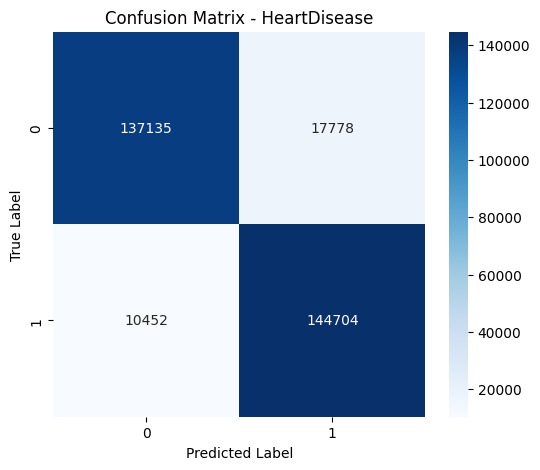

ROC AUC Score (Weighted - OvR): 0.9713


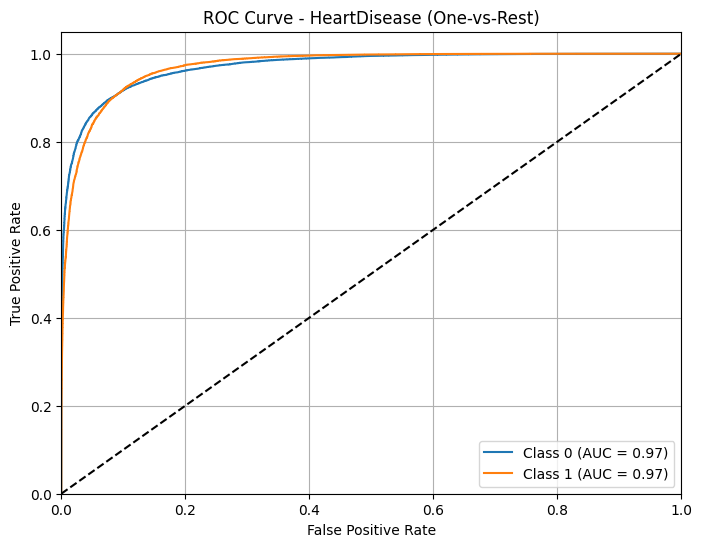


--- Metrik Evaluasi untuk Target: Stroke ---

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89    154661
           1       0.87      0.93      0.90    155408

    accuracy                           0.89    310069
   macro avg       0.90      0.89      0.89    310069
weighted avg       0.90      0.89      0.89    310069



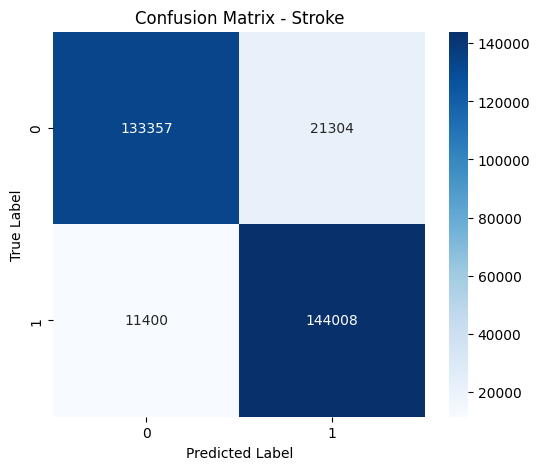

ROC AUC Score (Weighted - OvR): 0.9630


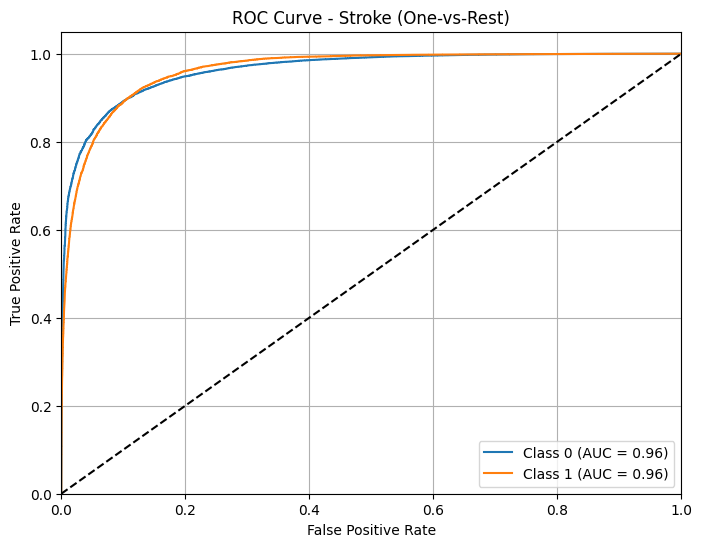


--- Metrik Evaluasi untuk Target: Diabetes ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    155065
           1       1.00      1.00      1.00    155004

    accuracy                           1.00    310069
   macro avg       1.00      1.00      1.00    310069
weighted avg       1.00      1.00      1.00    310069



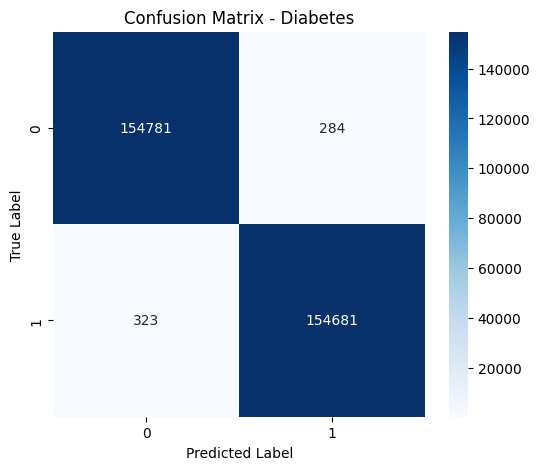

ROC AUC Score (Weighted - OvR): 1.0000


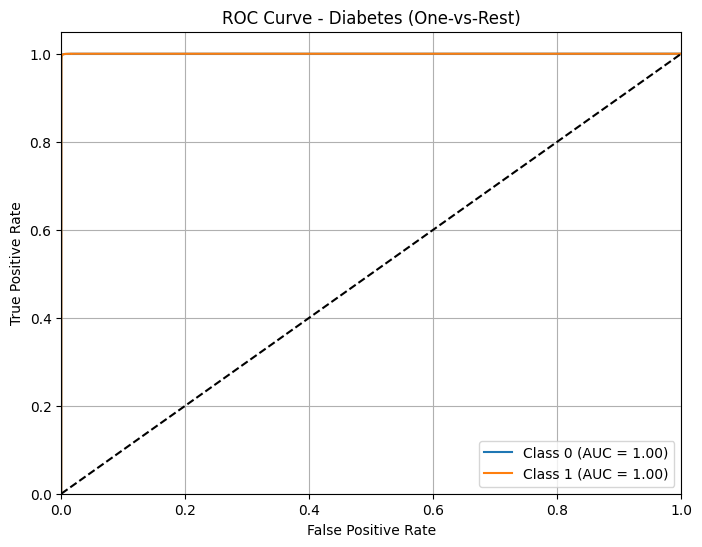

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluasi Model pada Data Uji ---
print("\n=== Evaluasi Model pada Data Uji ===")
evaluation_results = model.evaluate(X_test_processed, y_test_dict, verbose=0)

# Hasil evaluasi akan menjadi list, urutan sesuai dengan compile metrics
print(f"Total Loss: {evaluation_results[0]:.4f}")
# Cetak metrik untuk setiap output
for i in range(len(targets)):
    print(f"  Target {i+1} Loss: {evaluation_results[i+1]:.4f}")
    print(f"  Target {i+1} Accuracy: {evaluation_results[i+1+len(targets)]:.4f}")

# --- Membuat Prediksi ---
predictions = model.predict(X_test_processed)

# --- Evaluasi Detail per Target Output ---
for i, target_col in enumerate(targets):
    print(f"\n--- Metrik Evaluasi untuk Target: {target_col} ---")

    # Ambil probabilitas prediksi untuk target ini
    pred_prob = predictions[i]
    # Konversi probabilitas ke kelas prediksi (indeks dengan probabilitas tertinggi)
    predicted_classes = np.argmax(pred_prob, axis=1)

    # Ambil kelas sebenarnya (dari one-hot encoded ke integer)
    true_classes = np.argmax(y_test_list[i], axis=1)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(true_classes, predicted_classes, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(true_classes),
                yticklabels=np.unique(true_classes))
    plt.title(f'Confusion Matrix - {target_col}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC AUC (Jika target biner atau multiclass-one-vs-rest)
    # Ini akan bekerja jika jumlah kelas untuk target tersebut > 1
    if num_classes_per_target[i] > 1:
        try:
            # ROC AUC untuk multiclass (rata-rata per kelas)
            auc_score = roc_auc_score(y_test_list[i], pred_prob, multi_class='ovr', average='weighted')
            print(f"ROC AUC Score (Weighted - OvR): {auc_score:.4f}")

            # Plot ROC Curve (Contoh untuk beberapa kelas pertama jika multiclass)
            plt.figure(figsize=(8, 6))
            for j in range(num_classes_per_target[i]):
                fpr, tpr, _ = roc_curve(y_test_list[i][:, j], pred_prob[:, j])
                plt.plot(fpr, tpr, label=f'Class {j} (AUC = {roc_auc_score(y_test_list[i][:, j], pred_prob[:, j]):.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {target_col} (One-vs-Rest)')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()

        except ValueError as e:
            print(f"Tidak dapat menghitung ROC AUC untuk {target_col}: {e}")
    else:
        print(f"ROC AUC tidak berlaku untuk target biner '{target_col}' jika hanya ada satu kelas.")

## TensorFlow RF

In [ ]:
import pandas as pd
import numpy as np
import ydf # Import ydf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ydf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping # Untuk NN, kurang relevan di TF-DF



In [ ]:
targets = y.columns
print(targets)

Index(['HeartDisease', 'Stroke', 'Diabetes'], dtype='object')


In [ ]:
# Gabungkan df1 dan df3 secara horizontal (axis=1)
df = pd.concat([X, y], axis=1)
print("\nDataFrame Gabungan (Horizontal):")
print(df)


DataFrame Gabungan (Horizontal):
        Hypertension HighChol CholCheck  BMI SmokingStatus PhysActivity  \
0                  1        1         1   40             1            0   
1                  0        0         0   25             1            1   
2                  1        1         1   28             0            0   
3                  1        0         1   27             0            1   
4                  1        1         1   24             0            1   
...              ...      ...       ...  ...           ...          ...   
1550339            1        0         1   43             1            1   
1550340            1        1         1   28             0            0   
1550341            1        1         1   23             0            0   
1550342            1        1         1   31             0            1   
1550343            1        1         1   32             0            0   

        Fruits Veggies HvyAlcoholConsump AnyHealthcare  ... PhysH

In [ ]:
def df_to_dataset(dataframe, target_columns):
    dataframe = dataframe.copy()
    targets_data = {name: dataframe.pop(name) for name in target_columns}
    # Membuat dataset dari dictionary fitur dan dictionary target
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), targets_data))
    return ds

In [ ]:
# --- Split Data (Training, Validation, Testing) ---
# TF-DF mengharapkan target sebagai integer, bukan one-hot encoded
# Pertama, split menjadi train_val dan test
df = pd.concat([X, y], axis=1)
print("\nDataFrame Gabungan (Horizontal):")
print(df)

print("\nShape DataFrame setelah balancing:", df.shape)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# Kemudian, split train_val menjadi train dan validation
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) # 0.25 dari 0.8 = 0.2 dari total

print(f"Ukuran data training: {len(train_df)} sampel")
print(f"Ukuran data validation: {len(val_df)} sampel")
print(f"Ukuran data testing: {len(test_df)} sampel")

train_ds = df_to_dataset(train_df, targets)
val_ds = df_to_dataset(val_df, targets)
test_ds = df_to_dataset(test_df, targets)


DataFrame Gabungan (Horizontal):
        Hypertension HighChol CholCheck  BMI SmokingStatus PhysActivity  \
0                  1        1         1   40             1            0   
1                  0        0         0   25             1            1   
2                  1        1         1   28             0            0   
3                  1        0         1   27             0            1   
4                  1        1         1   24             0            1   
...              ...      ...       ...  ...           ...          ...   
1550339            1        0         1   43             1            1   
1550340            1        1         1   28             0            0   
1550341            1        1         1   23             0            0   
1550342            1        1         1   31             0            1   
1550343            1        1         1   32             0            0   

        Fruits Veggies HvyAlcoholConsump AnyHealthcare  ... PhysH

In [ ]:
# --- Penyetelan Hyperparameter ---
print("\n--- Memulai Penyetelan Hyperparameter ---")

# Inisialisasi RandomForestModel
# YDF tidak menggunakan TunerConfig secara langsung, melainkan model dapat diinisialisasi dengan hyperparameters yang ditentukan.
tuned_model = ydf.RandomForestModel(
    label=targets,  # Tentukan kolom target
    num_trees=100,   # Jumlah pohon dalam model
    max_depth=10,    # Kedalaman maksimum pohon
    min_examples=10, # Jumlah minimum contoh pada setiap node
    verbose=0        # Nonaktifkan verbose untuk proses training
)

# Latih model tanpa tuner
tuned_model.fit(
    x=train_df[features],
    y=train_df[targets],
    validation_data=(val_df[features], val_df[targets]) # Gunakan val_df untuk validasi
)

print("\n--- Penyetelan Hyperparameter Selesai ---")
print("Model telah dilatih dengan hyperparameter yang ditentukan:")

# Menampilkan hasil evaluasi model
inspector_tuned = tuned_model.make_inspector()
print(inspector_tuned.evaluation_result())


--- Memulai Penyetelan Hyperparameter ---


TypeError: GenericCCModel.__init__() got an unexpected keyword argument 'label'

In [ ]:
# --- Pelatihan Model Akhir dengan Hyperparameter Terbaik ---
print("\n--- Melatih Model Akhir ---")

# Dapatkan hyperparameter terbaik dari tuner
best_hyperparameters = tuned_model.make_inspector().hyperparameters()
print(f"Hyperparameter terbaik: {best_hyperparameters}")

# Buat model baru dengan hyperparameter terbaik (atau Anda bisa langsung pakai tuned_model jika sudah dilatih)
# Namun, melatih ulang dengan hyperparameter terbaik pada dataset yang lebih besar
# (jika tuning dilakukan pada subset) atau untuk memastikan convergence adalah praktik yang baik.
final_model = tfdf.keras.RandomForestModel(
    task=tfdf.keras.Task.CLASSIFICATION,
    label_columns=targets,
    # Terapkan hyperparameter terbaik yang ditemukan
    num_trees=best_hyperparameters['num_trees'],
    max_depth=best_hyperparameters['max_depth'],
    min_examples=best_hyperparameters['min_examples'],
    # ... tambahkan hyperparameter lain sesuai kebutuhan
    verbose=1 # Aktifkan verbose untuk melihat progress pelatihan model final
)

# Compile model (metrik saja)
final_model.compile(metrics=["accuracy"])

# Latih model final pada data training lengkap (atau gabungan train+val jika diinginkan)
final_model.fit(x=train_ds, validation_data=val_ds)

In [ ]:
# --- Evaluasi Model pada Data Uji ---
print("\n--- Evaluasi Model Akhir pada Data Uji ---")
evaluation_results = final_model.evaluate(x=test_ds, return_dict=True)

print("Hasil Evaluasi Global (untuk setiap target):")
for metric_name, value in evaluation_results.items():
    print(f"  {metric_name}: {value:.4f}")

# --- Membuat Prediksi ---
print("\n--- Membuat Prediksi pada Data Uji ---")
predictions_raw = final_model.predict(test_ds)

# Konversi prediksi probabilitas ke kelas label
predicted_labels = []
for i, pred_output in enumerate(predictions_raw):
    predicted_labels.append(np.argmax(pred_output, axis=1))

# Dapatkan true labels dari test_ds (perlu iterasi karena test_ds adalah tf.data.Dataset)
true_labels_dict = {name: [] for name in targets}
for features_batch, labels_batch in test_ds.as_numpy_iterator():
    for target_name, data in labels_batch.items():
        true_labels_dict[target_name].extend(data.tolist())

true_labels_list_of_arrays = [np.array(true_labels_dict[name]) for name in targets]


# --- Metrik Evaluasi Detail per Target (F1-Score, Confusion Matrix) ---
print("\n--- Metrik Evaluasi Detail per Target (Data Uji) ---")
for i, target_col in enumerate(targets):
    print(f"\n### Metrik untuk Target: {target_col} ###")

    y_true_target = true_labels_list_of_arrays[i]
    y_pred_target = predicted_labels[i]

    # Classification Report
    print("\nClassification Report:")
    # Buat target_names berdasarkan kelas unik yang ada di y_true_target
    target_names_for_report = [str(cls) for cls in sorted(np.unique(y_true_target))]
    print(classification_report(y_true_target, y_pred_target,
                                target_names=target_names_for_report,
                                zero_division=0))

    # F1-Score (Macro dan Weighted)
    f1_macro = f1_score(y_true_target, y_pred_target, average='macro', zero_division=0)
    f1_weighted = f1_score(y_true_target, y_pred_target, average='weighted', zero_division=0)
    print(f"  F1-Score (Macro Average): {f1_macro:.4f}")
    print(f"  F1-Score (Weighted Average): {f1_weighted:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true_target, y_pred_target)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true_target),
                yticklabels=np.unique(y_true_target))
    plt.title(f'Confusion Matrix - {target_col}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC AUC (Jika relevan dan target bukan biner)
    if len(np.unique(y_true_target)) > 2: # Hanya untuk multiclass (bukan binary)
        try:
            # Karena F1-score sudah dihitung, kita bisa lewatkan ROC AUC jika tidak esensial
            # Jika ingin ROC AUC, Anda perlu akses ke probabilitas per kelas untuk target ini.
            # pred_prob_target = predictions_raw[i]
            # auc_score = roc_auc_score(y_true_target, pred_prob_target, multi_class='ovr', average='weighted')
            # print(f"ROC AUC Score (Weighted - OvR): {auc_score:.4f}")
            pass
        except ValueError as e:
            print(f"Tidak dapat menghitung ROC AUC untuk {target_col}: {e}")

In [ ]:
# --- Pengecekan Overfitting ---
print("\n--- Pengecekan Overfitting ---")

# Dapatkan metrik dari model yang sudah dilatih (inspector)
inspector = final_model.make_inspector()

# Kita bisa melihat performa pada training data (in-bag) dan validation data (out-of-bag)
# Untuk RandomForestModel, OOB (Out-of-Bag) error sering digunakan sebagai indikasi validasi.
# Namun, jika kita menggunakan validation_data di .fit(), kita bisa membandingkan hasilnya.

# Performasi pada data training (gunakan model.evaluate() pada train_ds)
train_eval_results = final_model.evaluate(x=train_ds, return_dict=True, verbose=0)

# Performasi pada data validasi (sudah dilakukan sebelumnya di .evaluate())
val_eval_results = evaluation_results # Menggunakan hasil evaluation_results dari data uji

print("\nPerbandingan Metrik Training vs. Validation/Test:")
for target_name in targets:
    train_accuracy = train_eval_results.get(f'output_{target_name}_accuracy', None)
    val_accuracy = val_eval_results.get(f'output_{target_name}_accuracy', None)

    if train_accuracy is not None and val_accuracy is not None:
        print(f"\nTarget: {target_name}")
        print(f"  Training Accuracy: {train_accuracy:.4f}")
        print(f"  Validation/Test Accuracy: {val_accuracy:.4f}")

        if train_accuracy > val_accuracy and (train_accuracy - val_accuracy > 0.05): # Ambang batas bisa disesuaikan
            print(f"  --> Indikasi Overfitting Ringan/Sedang (Perbedaan Accuracy: {train_accuracy - val_accuracy:.4f})")
        elif train_accuracy <= val_accuracy:
            print(f"  Model tidak menunjukkan overfitting pada {target_name} (atau bahkan underfitting jika keduanya rendah).")
        else:
            print(f"  Model cukup seimbang pada {target_name}.")
    else:
        print(f"\nMetrik akurasi tidak ditemukan untuk {target_name} di salah satu dataset.")


# Visualisasi Training Log (jika ada) - TF-DF tidak selalu memberikan history yang sama dengan Keras NN
# Inspector juga bisa memberikan informasi training log.
print("\n--- Training Logs dari Inspector (untuk melihat convergence) ---")
# Untuk RandomForestModel, ada info mengenai OOB (Out-of-Bag) loss per tree
# Ini bisa jadi indikasi convergence
try:
    oob_loss_per_tree = inspector.oob_metrics
    if oob_loss_per_tree:
        # Asumsikan OOB Loss adalah untuk "default_task" atau task pertama
        plt.figure(figsize=(10, 6))
        for target_idx, target_col in enumerate(targets):
            # Ini mungkin perlu disesuaikan tergantung bagaimana oob_metrics disimpan untuk multi-output
            # Biasanya, ini akan per task/target.
            plt.plot(oob_loss_per_tree[f'output_{target_col}_loss'], label=f'{target_col} OOB Loss')
        plt.title('Out-of-Bag (OOB) Loss per Tree (Convergence Check)')
        plt.xlabel('Number of Trees')
        plt.ylabel('OOB Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Tidak ada OOB metrics yang tersedia.")
except Exception as e:
    print(f"Tidak dapat mengakses OOB metrics: {e}")

# Visualisasi Feature Importance
print("\n--- Interpretasi Model: Feature Importance ---")
print(inspector.variable_importances())

importances = inspector.variable_importances()
if importances:
    for importance_type_info in importances:
        importance_type_name = importance_type_info.type.name
        print(f"\nFeature Importance ({importance_type_name}):")

        # Sortir dan tampilkan top N fitur
        sorted_features = sorted(importance_type_info.value, key=lambda x: x[1], reverse=True)

        features_to_plot = [x[0] for x in sorted_features[:10]] # Top 10
        scores_to_plot = [x[1] for x in sorted_features[:10]]

        if features_to_plot:
            plt.figure(figsize=(10, 6))
            plt.barh(features_to_plot, scores_to_plot)
            plt.xlabel(f"Importance Score ({importance_type_name})")
            plt.ylabel("Feature")
            plt.title(f"Top 10 Feature Importance ({importance_type_name})")
            plt.gca().invert_yaxis()
            plt.show()
        else:
            print(f"Tidak ada fitur penting untuk tipe '{importance_type_name}'.")

In [ ]:
# --- Menyimpan Model ---
model_save_dir = 'tfdf_multioutput_model'
final_model.save(model_save_dir)
print(f"\nModel TF-DF berhasil disimpan di: {model_save_dir}")

# --- Memuat Model ---
# loaded_tfdf_model = tf.keras.models.load_model(model_save_dir)
# print("Model TF-DF berhasil dimuat kembali.")

# Prediksi dan Interpretasi Output

In [ ]:
y_test_dict

{'output_target_1': array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]]),
 'output_target_2': array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]]),
 'output_target_3': array([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]])}

In [ ]:
# Lakukan prediksi pada data baru (contoh data test)
predictions = model.predict(X_test_processed)

# Prediksi probabilitas untuk setiap penyakit
pred_heart_prob = predictions[0]
pred_stroke_prob = predictions[1]
pred_diabetes_prob = predictions[2]

# Konversi probabilitas menjadi kelas biner (risiko tinggi/rendah)
# Anda perlu menentukan threshold (misalnya 0.5)
threshold = 0.5
pred_heart_class = (pred_heart_prob > threshold).astype(int)
pred_stroke_class = (pred_stroke_prob > threshold).astype(int)
pred_diabetes_class = (pred_diabetes_prob > threshold).astype(int)

# Hitung metrik tambahan (Presisi, Recall, F1-Score, Confusion Matrix)
# Penting: Lakukan ini hanya untuk baris di mana label target tidak NaN.
# Anda perlu memfilter y_test_dict dan pred_..._class.

9690/9690 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# --- Hitung metrik tambahan (Presisi, Recall, F1-Score, Confusion Matrix) ---

# Contoh untuk Heart Disease
# Convert one-hot encoded true and predicted labels to 1D arrays
true_classes_heart = np.argmax(y_test_dict['output_target_1'], axis=1)
predicted_classes_heart = np.argmax(pred_heart_class, axis=1) # Use np.argmax on the predicted classes as well

print("\n--- Metrik Lebih Lanjut untuk Heart Disease ---")
# Use zero_division parameter to handle cases with no predicted positive samples
print(f"Precision: {precision_score(true_classes_heart, predicted_classes_heart, zero_division=0):.4f}")
print(f"Recall: {recall_score(true_classes_heart, predicted_classes_heart, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(true_classes_heart, predicted_classes_heart, zero_division=0):.4f}")
print("Confusion Matrix:\n", confusion_matrix(true_classes_heart, predicted_classes_heart))

# Example for Stroke
# Convert one-hot encoded true and predicted labels to 1D arrays
true_classes_stroke = np.argmax(y_test_dict['output_target_2'], axis=1)
predicted_classes_stroke = np.argmax(pred_stroke_class, axis=1) # Use np.argmax on the predicted classes as well

print("\n--- Metrik Lebih Lanjut untuk Stroke ---")
print(f"Precision: {precision_score(true_classes_stroke, predicted_classes_stroke, zero_division=0):.4f}")
print(f"Recall: {recall_score(true_classes_stroke, predicted_classes_stroke, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(true_classes_stroke, predicted_classes_stroke, zero_division=0):.4f}")
print("Confusion Matrix:\n", confusion_matrix(true_classes_stroke, predicted_classes_stroke))

# Example for Diabetes
# Convert one-hot encoded true and predicted labels to 1D arrays
true_classes_diabetes = np.argmax(y_test_dict['output_target_3'], axis=1)
predicted_classes_diabetes = np.argmax(pred_diabetes_class, axis=1) # Use np.argmax on the predicted classes as well

print("\n--- Metrik Lebih Lanjut untuk Diabetes ---")
print(f"Precision: {precision_score(true_classes_diabetes, predicted_classes_diabetes, zero_division=0):.4f}")
print(f"Recall: {recall_score(true_classes_diabetes, predicted_classes_diabetes, zero_division=0):.4f}")
print(f"F1-Score: {f1_score(true_classes_diabetes, predicted_classes_diabetes, zero_division=0):.4f}")
print("Confusion Matrix:\n", confusion_matrix(true_classes_diabetes, predicted_classes_diabetes))


# Contoh interpretasi untuk satu individu (misalkan individu pertama di test set)
sample_index = 0
print(f"\n--- Prediksi untuk Sampel Individu ke-{sample_index} ---")
# Use NumPy indexing instead of .iloc for X_test_processed
print(f"Fitur Input (Processed): {X_test_processed[sample_index][:5]}...")

# Access true labels from the 1D arrays
print(f"Label Aktual Heart Disease: {true_classes_heart[sample_index]}")
# Access predicted probabilities correctly from the 2D array
print(f"Prediksi Probabilitas Heart Disease (Class 1): {pred_heart_prob[sample_index][1]:.4f}")
# Access predicted class correctly from the 1D array
print(f"Prediksi Kelas Heart Disease: {'Risiko Tinggi' if predicted_classes_heart[sample_index] == 1 else 'Risiko Rendah'}")

print(f"Label Aktual Stroke: {true_classes_stroke[sample_index]}")
print(f"Prediksi Probabilitas Stroke (Class 1): {pred_stroke_prob[sample_index][1]:.4f}")
print(f"Prediksi Kelas Stroke: {'Risiko Tinggi' if predicted_classes_stroke[sample_index] == 1 else 'Risiko Rendah'}")

print(f"Label Aktual Diabetes: {true_classes_diabetes[sample_index]}")
print(f"Prediksi Probabilitas Diabetes (Class 1): {pred_diabetes_prob[sample_index][1]:.4f}")
print(f"Prediksi Kelas Diabetes: {'Risiko Tinggi' if predicted_classes_diabetes[sample_index] == 1 else 'Risiko Rendah'}")

# Untuk interpretasi faktor pendorong risiko, Anda perlu menggunakan library seperti SHAP
# Ini akan menjadi langkah analisis terpisah setelah model dilatih.
# import shap
# explainer = shap.DeepExplainer(model, X_train_sample_for_shap) # Butuh sample data untuk DeepExplainer
# shap_values = explainer.shap_values(X_test_sample) # Pilih sample dari X_test untuk diinterpretasi
# shap.summary_plot(shap_values[0], X_test_sample, feature_names=feature_names, plot_type="bar", show=False)
# plt.title('SHAP Values for Heart Disease Prediction')
# plt.show()
# # Lakukan ini untuk setiap output head


--- Metrik Lebih Lanjut untuk Heart Disease ---
Precision: 0.8906
Recall: 0.9326
F1-Score: 0.9111
Confusion Matrix:
 [[137135  17778]
 [ 10452 144704]]

--- Metrik Lebih Lanjut untuk Stroke ---
Precision: 0.8711
Recall: 0.9266
F1-Score: 0.8980
Confusion Matrix:
 [[133357  21304]
 [ 11400 144008]]

--- Metrik Lebih Lanjut untuk Diabetes ---
Precision: 0.9982
Recall: 0.9979
F1-Score: 0.9980
Confusion Matrix:
 [[154781    284]
 [   323 154681]]

--- Prediksi untuk Sampel Individu ke-0 ---
Fitur Input (Processed): [ 0.23605166 -0.36191815 -0.70696706 -0.23502027 -1.1442123 ]...
Label Aktual Heart Disease: 1
Prediksi Probabilitas Heart Disease (Class 1): 0.8106
Prediksi Kelas Heart Disease: Risiko Tinggi
Label Aktual Stroke: 0
Prediksi Probabilitas Stroke (Class 1): 0.4508
Prediksi Kelas Stroke: Risiko Rendah
Label Aktual Diabetes: 0
Prediksi Probabilitas Diabetes (Class 1): 0.0001
Prediksi Kelas Diabetes: Risiko Rendah


In [ ]:
import pandas as pd

# Buat contoh DataFrame pertama
data1 = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data1)
print("DataFrame 1:")
print(df1)

# Buat contoh DataFrame kedua
data2 = {'col1': [5, 6], 'col2': [7, 8]}
df2 = pd.DataFrame(data2)
print("\nDataFrame 2:")
print(df2)

# Gabungkan kedua DataFrame secara vertikal (axis=0, default)
df_combined_vertical = pd.concat([df1, df2], ignore_index=True)
print("\nDataFrame Gabungan (Vertikal):")
print(df_combined_vertical)

# Buat contoh DataFrame ketiga dengan kolom yang berbeda untuk penggabungan horizontal
data3 = {'col3': [9, 10], 'col4': [11, 12]}
df3 = pd.DataFrame(data3)
print("\nDataFrame 3 (untuk penggabungan horizontal):")
print(df3)

# Gabungkan df1 dan df3 secara horizontal (axis=1)
df_combined_horizontal = pd.concat([df1, df3], axis=1)
print("\nDataFrame Gabungan (Horizontal):")
print(df_combined_horizontal)